# Business Understanding

## Objective

The primary goal of this task is to determine if macroeconomic indicators (such as USD Index, S&P 500, Interest Rates, Inflation, Oil & Natural Gas Price, US Equity Market Volatility) and historical price movements of precious metals can be leveraged to predict the daily price direction of Gold and Silver.

## Problem

Gold and silver play important role mainly as hedging instruments during periods of inflation, economic uncertainty. Without clear understanding of how macroeconomic factors influence these metals, investors will have incomplete information leading to ineffective decisions. This project translates complex economic data into actionable business intelligence that supports better investment strategies and portfolio diversification.

## Research Question

* How do key macroeconomic indicators such as USD Index, S&P 500, Interest Rates, Inflation, Oil & Natural Gas Price, US Equity Market Volatility influence the price movements of precious metals gold and silver ?
* Which macroecononic indicators have highest influence on gold and silver price movements.
* Is silver more accurately predictable than gold ?

# Data Understanding

## Data Acquisition

Follow data has been acquired using appropriate tickers from Yahoo Finance and FRED Database using python modules - *yfinance* and *pandas_datareader*.

* **GC=F** : Gold Futures (Yahoo Finance)
* **SI=F** : Silver Futures (Yahoo Finance)
* **CL=F**: WTI Oil Futures (Yahoo Finance)
* **NG=F**: Natural Gas Futures (Yahoo Finance)
* **^GSPC** : S&P 500 Index (Yahoo Finance)
* **^TNX** : CBOE 10-Year Treasury Note Yield Index (Yahoo Finance)
* **^VIX** : CBOE Volatility Index (Yahoo Finance)
* **DFII10** : Real Interest Rates - Inflation-Indexed (FRED)
* **DTWEXBGS** : USD Index (FRED)
* **CPIAUCSL** : Consumer Price Index Data (FRED)

In [2]:
# Import libraries
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Data Collection – Yahoo Finance

Historical price data for Gold, Silver, WTI Oil, Natural Gas and the index data for S&P 500, 10-year yield, Market Volatility Index (beginning in 2000) were obtained from Yahoo Finance.

**Note:** Due to local environment limitations preventing successful installation of the "yfinance" package, Google Colab was used to download the data. The corresponding data retrieval code is provided below for reproducibility.



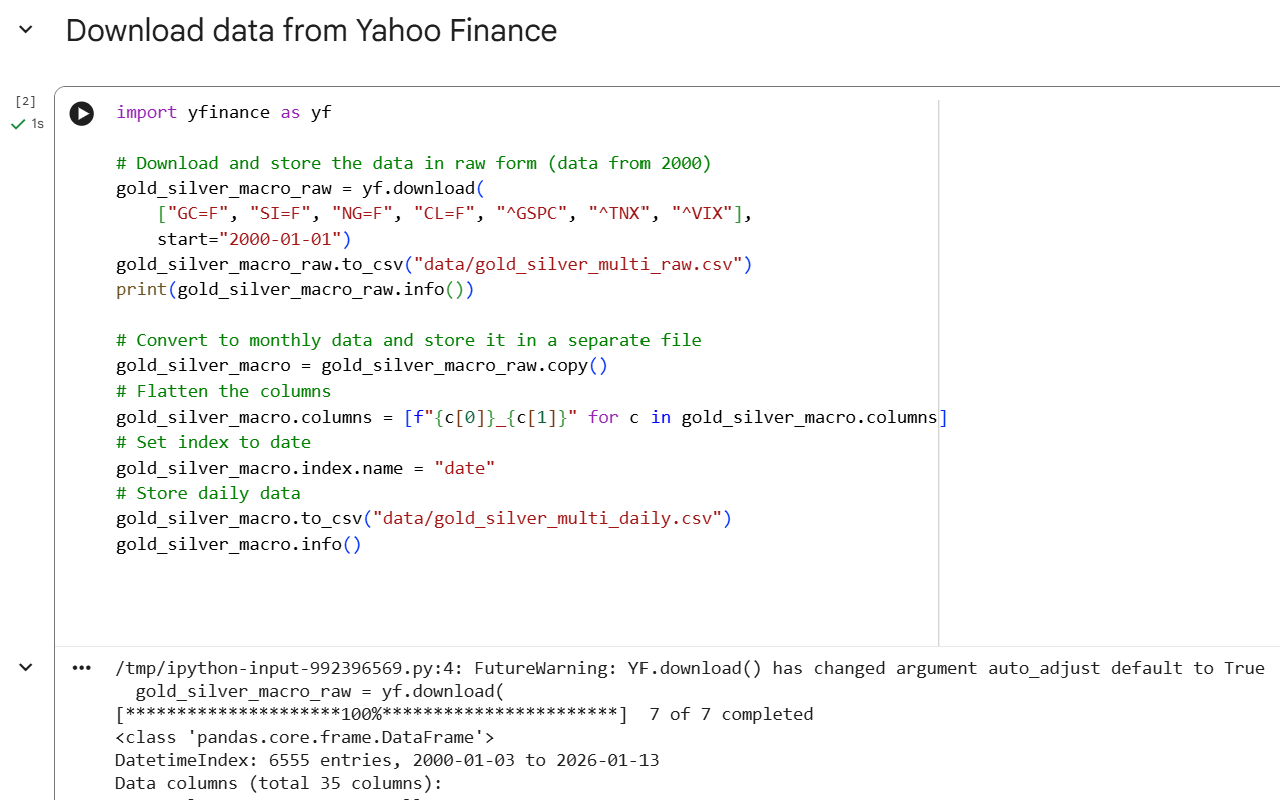


### Data Collection - FRED

Historical price data for **Consumer Price Index (CPI)** is obtained from FRED, beginning 2000.

In [251]:
start_date = '2000-01-01'

# Download and store the data in faw form
cpi_raw = pdr.DataReader("CPIAUCSL", "fred", start=start_date)
cpi_raw.to_csv("data/cpi_raw.csv")
print("\n***** Raw Data *****")
print(cpi_raw.info())

# Capture monthly data and store it
cpi_raw.index.name = "date"
cpi = cpi_raw.resample("ME").mean()
cpi.to_csv("data/cpi_monthly.csv")
print("\n***** Monthly Data *****")
print(cpi.info())

cpi.head(5)


***** Raw Data *****
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311 entries, 2000-01-01 to 2025-11-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  310 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB
None

***** Monthly Data *****
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311 entries, 2000-01-31 to 2025-11-30
Freq: ME
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  310 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB
None


,CPIAUCSL
date,
2000-01-31,169.3
2000-02-29,170.0
2000-03-31,171.0
2000-04-30,170.9
2000-05-31,171.2


Historical data for **Real Interest Rates (DFII10)** is obtained from FRED, beginning 2000.

In [249]:
start_date = '2000-01-01'

# Download and store the data in raw form
real_rate_raw = pdr.DataReader("DFII10", "fred", start=start_date)
real_rate_raw.to_csv("data/real_rate_raw.csv")
print("\n***** Raw Data *****")
print(real_rate_raw.info())
real_rate_raw

# Store daily data
real_rate_raw.index.name = "date"
real_rate_daily = real_rate_raw.copy()
real_rate_daily.to_csv("data/real_rate_daily.csv")
print("\n***** Daily Data *****")
print(real_rate_daily.info())

real_rate_daily.head(5)


***** Raw Data *****
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6007 entries, 2003-01-02 to 2026-01-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DFII10  5759 non-null   float64
dtypes: float64(1)
memory usage: 93.9 KB
None

***** Daily Data *****
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6007 entries, 2003-01-02 to 2026-01-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DFII10  5759 non-null   float64
dtypes: float64(1)
memory usage: 93.9 KB
None


,DFII10
date,
2003-01-02,2.43
2003-01-03,2.43
2003-01-06,2.46
2003-01-07,2.42
2003-01-08,2.29


Historical data of **USD Index** is obtained from FRED, beginning 2006 (not available since 2000)

In [252]:
start_date = '2000-01-01'
# Download and store the data in faw form
usd_index_raw = pdr.DataReader("DTWEXBGS", "fred", start=start_date)
usd_index_raw.to_csv("data/usd_index_raw.csv")
print("\n***** Raw Data *****")
print(usd_index_raw.info())

# Store daily data
usd_index_raw.index.name = "date"
usd_index_daily = usd_index_raw.copy()
usd_index_daily.to_csv("data/usd_index_daily.csv")

usd_index_daily.head(5)


***** Raw Data *****
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5225 entries, 2006-01-02 to 2026-01-09
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DTWEXBGS  5019 non-null   float64
dtypes: float64(1)
memory usage: 81.6 KB
None


,DTWEXBGS
date,
2006-01-02,101.4155
2006-01-03,100.7558
2006-01-04,100.2288
2006-01-05,100.2992
2006-01-06,100.0241


## Data Integration & Merging

All datasets were merged into a single monthly time-series dataset named gold_silver_macro, containing gold and silver prices along with key macroeconomic indicators. Also renamed the columns for better interpretition.

The merged dataset will be used consistently throughout for the Exploratory Data Analysis, and Modeling.

### Load Gold, Silver, Oil, Gas Price, SP500 Data, 10-year yield, Volatility Index

In [102]:
gold_silver_multi_daily = pd.read_csv('data/gold_silver_multi_daily.csv', index_col='date')
gold_silver_multi_daily.info()
gold_silver_multi_daily

<class 'pandas.core.frame.DataFrame'>
Index: 6554 entries, 2000-01-03 to 2026-01-12
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close_CL=F    6374 non-null   float64
 1   Close_GC=F    6365 non-null   float64
 2   Close_NG=F    6371 non-null   float64
 3   Close_SI=F    6367 non-null   float64
 4   Close_^GSPC   6545 non-null   float64
 5   Close_^TNX    6539 non-null   float64
 6   Close_^VIX    6546 non-null   float64
 7   High_CL=F     6374 non-null   float64
 8   High_GC=F     6365 non-null   float64
 9   High_NG=F     6371 non-null   float64
 10  High_SI=F     6367 non-null   float64
 11  High_^GSPC    6545 non-null   float64
 12  High_^TNX     6539 non-null   float64
 13  High_^VIX     6546 non-null   float64
 14  Low_CL=F      6374 non-null   float64
 15  Low_GC=F      6365 non-null   float64
 16  Low_NG=F      6371 non-null   float64
 17  Low_SI=F      6367 non-null   float64
 18  Low_^GSPC     6545

,Close_CL=F,Close_GC=F,Close_NG=F,Close_SI=F,Close_^GSPC,Close_^TNX,Close_^VIX,High_CL=F,High_GC=F,High_NG=F,...,Open_^GSPC,Open_^TNX,Open_^VIX,Volume_CL=F,Volume_GC=F,Volume_NG=F,Volume_SI=F,Volume_^GSPC,Volume_^TNX,Volume_^VIX
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,1455.219971,6.548,24.209999,NaN,NaN,NaN,...,1469.250000,6.498,24.360001,NaN,NaN,NaN,NaN,9.318000e+08,0.0,0.0
2000-01-04,NaN,NaN,NaN,NaN,1399.420044,6.485,27.010000,NaN,NaN,NaN,...,1455.219971,6.530,24.940001,NaN,NaN,NaN,NaN,1.009000e+09,0.0,0.0
2000-01-05,NaN,NaN,NaN,NaN,1402.109985,6.599,26.410000,NaN,NaN,NaN,...,1399.420044,6.521,27.980000,NaN,NaN,NaN,NaN,1.085500e+09,0.0,0.0
2000-01-06,NaN,NaN,NaN,NaN,1403.449951,6.549,25.730000,NaN,NaN,NaN,...,1402.109985,6.558,26.680000,NaN,NaN,NaN,NaN,1.092300e+09,0.0,0.0
2000-01-07,NaN,NaN,NaN,NaN,1441.469971,6.504,21.719999,NaN,NaN,NaN,...,1403.449951,6.545,25.139999,NaN,NaN,NaN,NaN,1.225200e+09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-06,57.130001,4482.200195,3.350,80.529999,6944.819824,4.179,14.750000,58.869999,4482.200195,3.502,...,6908.029785,4.173,15.000000,292067.0,459.0,145165.0,580.0,5.509680e+09,0.0,0.0
2026-01-07,55.990002,4449.299805,3.525,77.135002,6920.930176,4.138,15.380000,57.169998,4450.000000,3.591,...,6945.069824,4.132,14.950000,383128.0,972.0,151941.0,2093.0,5.214480e+09,0.0,0.0
2026-01-08,57.759998,4449.700195,3.407,74.716003,6921.459961,4.183,15.450000,58.740002,4461.299805,3.634,...,6914.109863,4.167,15.690000,334134.0,2423.0,193218.0,1447.0,5.333200e+09,0.0,0.0


### Extract Closing Price

The data contains Open, Close, High, Low and Volume for each of the features. The data at the close of the day will be used for the analysis.

In [103]:
# Extract CLOSING price, this will be used for analysis
gold_silver_multi_daily_close = gold_silver_multi_daily[['Close_GC=F', 'Close_SI=F', 'Close_CL=F', 'Close_NG=F', 
                                                   'Close_^GSPC', 'Close_^TNX', 'Close_^VIX']]

gold_silver_multi_daily_close.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6554 entries, 2000-01-03 to 2026-01-12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_GC=F   6365 non-null   float64
 1   Close_SI=F   6367 non-null   float64
 2   Close_CL=F   6374 non-null   float64
 3   Close_NG=F   6371 non-null   float64
 4   Close_^GSPC  6545 non-null   float64
 5   Close_^TNX   6539 non-null   float64
 6   Close_^VIX   6546 non-null   float64
dtypes: float64(7)
memory usage: 409.6+ KB


### Load CPI, Interest Rates and USD Index

In [104]:
cpi_monthly = pd.read_csv('data/cpi_monthly.csv', index_col="date")
real_rate_daily = pd.read_csv('data/real_rate_daily.csv', index_col="date")
usd_index_daily = pd.read_csv('data/usd_index_daily.csv', index_col="date")

### Merge Data

All the data is merged into a single dataset indexed by date.

**NOTE**: CPI data is released on monthly basis. So it creates mismatch with other data on daily basis. So the CPI index will be expanded from monthly into daily basis by forward filling. However, calculating daily percentage changes on upsampled data would result in signal sparsity, where the feature contains zero values for approximately 20 out of 21 trading days per month. So the CPI month-on-month (MoM) and year-on-year (YoY) values are computed while data is still in original format before the CPI index will be expanded using forward filling method. 

In [105]:
# Ensure date is set as index with date format
for df in [gold_silver_multi_daily_close, cpi_monthly, real_rate_daily, usd_index_daily]:
    df.index.name = "date"
    df.index = pd.to_datetime(df.index)

# Compute Year-on-Year (YoY) and Month-on-Month (MoM) CPI Data
cpi_monthly['cpi_YoY'] = cpi_monthly['CPIAUCSL'].pct_change(periods=12, fill_method=None)
cpi_monthly['cpi_MoM'] = cpi_monthly['CPIAUCSL'].pct_change(periods=1, fill_method=None)

# Merge the data with left join to preserve the daily indices when merging CPI monthly data
merged_df = gold_silver_multi_daily_close \
                .merge(cpi_monthly, left_index=True, right_index=True, how='left') \
                .merge(real_rate_daily, left_index=True, right_index=True, how='left') \
                .merge(usd_index_daily, left_index=True, right_index=True, how='left')

# Now forward fill all the CPI related data
merged_df['cpi_YoY'] = merged_df['cpi_YoY'].ffill()
merged_df['cpi_MoM'] = merged_df['cpi_MoM'].ffill()
merged_df['CPIAUCSL'] = merged_df['CPIAUCSL'].ffill()

# Leave the missing data (NaN) which will be cleaned up later
gold_silver_macro = merged_df.copy()

gold_silver_macro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6554 entries, 2000-01-03 to 2026-01-12
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_GC=F   6365 non-null   float64
 1   Close_SI=F   6367 non-null   float64
 2   Close_CL=F   6374 non-null   float64
 3   Close_NG=F   6371 non-null   float64
 4   Close_^GSPC  6545 non-null   float64
 5   Close_^TNX   6539 non-null   float64
 6   Close_^VIX   6546 non-null   float64
 7   CPIAUCSL     6535 non-null   float64
 8   cpi_YoY      6282 non-null   float64
 9   cpi_MoM      6515 non-null   float64
 10  DFII10       5752 non-null   float64
 11  DTWEXBGS     4976 non-null   float64
dtypes: float64(12)
memory usage: 665.6 KB


### Rename Columns
For readability, column names will be renamed prior to EDA analysis. No data values will be modified at this stage. All cleaning and transformations will be performed during the Data Preparation phase.

In [106]:
gold_silver_macro = gold_silver_macro.rename(columns={
    'Close_GC=F': 'gold_price',
    'Close_SI=F': 'silver_price',
    'Close_CL=F': 'wti_oil_price',
    'Close_NG=F': 'nat_gas_price',
    'Close_^GSPC': 'sp500_index',
    'Close_^TNX': '10y_yield',
    'Close_^VIX': 'vol_index',
    'DFII10': 'real_rate',
    'DTWEXBGS': 'usd_index',
    'CPIAUCSL': 'cpi_level'
})

gold_silver_macro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6554 entries, 2000-01-03 to 2026-01-12
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gold_price     6365 non-null   float64
 1   silver_price   6367 non-null   float64
 2   wti_oil_price  6374 non-null   float64
 3   nat_gas_price  6371 non-null   float64
 4   sp500_index    6545 non-null   float64
 5   10y_yield      6539 non-null   float64
 6   vol_index      6546 non-null   float64
 7   cpi_level      6535 non-null   float64
 8   cpi_YoY        6282 non-null   float64
 9   cpi_MoM        6515 non-null   float64
 10  real_rate      5752 non-null   float64
 11  usd_index      4976 non-null   float64
dtypes: float64(12)
memory usage: 665.6 KB


### Data Description

The dataset is comprised of historical daily observations spanning from 2006 to 2026, integrated from multiple sources:

**Target Variables (Gold and Silver)**:

* **Gold (GC=F)**: Daily closing price in USD per troy ounce.
* **Silver (SI=F)**: Daily closing price in USD per troy ounce.
  
**Energy Commodities**:

* **WTI Crude Oil (CL=F)**: The benchmark for U.S. oil prices, it serves as a leading indicator for global industrial demand and energy-driven inflation.
* **Natural Gas (NG=F)**: A key energy input and highly volatile commodity that influences broader commodity market sentiment.

**Currency & Equity Benchmarks**:

* **U.S. Dollar Index (DTWEXBGS)**: It is a measure of the dollar's value against a basket of six major foreign currencies (Euro, Japanese Yen, British Pound, Canadian Dollar, Swedish Krona, Swiss Franc) to gauge its strength in global markets. Historically, USD Index exhibits a strong inverse correlation with Gold.
* **S&P 500 Index (^GSPC)**: A benchmark for the U.S. equity market, measures the stock prices of 500 of the largest, publicly-traded companies in the US.

**Interest Rates & Volatility**:

* **10-Year Treasury Yield (^TNX)**: The annual return an investor earns on a U.S. Treasury note that matures in 10 years. The return on benchmark U.S. government debt.
* **CBOE Volatility Index (VIX)**: Often called the "Fear Index", it measures market expectations of near-term volatility.

**Inflation Indicators (Macro)**:

* **Consumer Price Index (CPI)**: Monthly index level transformed into YoY and MoM growth rates. Used to capture the inflationary regime, a fundamental driver of "Safe Haven" asset demand.

### Data Quality Checks

#### Check for missing values

The data contains few missing values, mainly due to merging of the datasets. The usd_index has high number of missing values because it's data is available beginning 2006 while other data is available beginning 2000. During data preparation phase, the missing values will be handled.

In [107]:
gold_silver_macro.isna().sum()

gold_price        189
silver_price      187
wti_oil_price     180
nat_gas_price     183
sp500_index         9
10y_yield          15
vol_index           8
cpi_level          19
cpi_YoY           272
cpi_MoM            39
real_rate         802
usd_index        1578
dtype: int64

#### Check for duplicates

There are no duplicates

In [108]:
gold_silver_macro.index.duplicated().sum()

0

#### Check for data types

All the features are represented as floating point numbers and will be retained as the same data type to preserve the precision.

In [109]:
gold_silver_macro.dtypes

gold_price       float64
silver_price     float64
wti_oil_price    float64
nat_gas_price    float64
sp500_index      float64
10y_yield        float64
vol_index        float64
cpi_level        float64
cpi_YoY          float64
cpi_MoM          float64
real_rate        float64
usd_index        float64
dtype: object

#### Data Consistency and Frequency

Dataset contains 6554 rows with unique dates, with data from Jan 2000 to Jan 2026. The data is very consistent covering each weekday (except weekends).

In [110]:
gold_silver_macro.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2025-12-29', '2025-12-30', '2025-12-31', '2026-01-02',
               '2026-01-05', '2026-01-06', '2026-01-07', '2026-01-08',
               '2026-01-09', '2026-01-12'],
              dtype='datetime64[ns]', name='date', length=6554, freq=None)

#### Check sample records

In [111]:
gold_silver_macro.sample(10)

,gold_price,silver_price,wti_oil_price,nat_gas_price,sp500_index,10y_yield,vol_index,cpi_level,cpi_YoY,cpi_MoM,real_rate,usd_index
date,,,,,,,,,,,,
2020-01-07,1571.800049,18.316000,62.700001,2.162,3237.179932,1.827,13.790000,258.630,0.023195,0.002912,0.09,115.1467
2010-09-22,1290.199951,21.035999,74.709999,3.966,1134.280029,2.548,22.510000,217.923,0.011502,0.001461,0.74,92.0647
2019-06-26,1411.599976,15.283000,59.380001,2.291,2913.780029,2.049,16.209999,255.296,0.017959,0.000247,0.35,114.5619
2015-08-12,1123.199951,15.473000,43.299999,2.931,2086.050049,2.130,13.610000,238.034,0.002257,0.001586,0.52,109.4655
2021-01-25,1854.900024,25.455000,52.770000,2.602,3855.360107,1.040,23.190001,262.045,0.013204,0.004346,-1.03,111.8767
2007-12-14,793.299988,13.826000,91.269997,7.025,1467.949951,4.232,23.270000,210.834,0.043733,0.007859,1.90,90.4345
2003-11-14,397.799988,5.411000,32.369999,5.112,1050.349976,4.233,16.940001,184.900,0.020419,-0.001080,1.87,NaN
2005-01-25,422.000000,6.670000,49.639999,6.403,1168.410034,4.189,14.060000,191.700,0.033423,0.000000,1.74,NaN
2004-05-24,385.600006,5.990000,41.720001,6.705,1095.410034,4.740,18.080000,187.400,0.022926,0.001603,2.01,NaN


### Exploratory Data Analysis (EDA)

#### Trend Analysis - Gold and Silver

These plot illustrates the long term movement of gold and silver prices and their ratios over time.


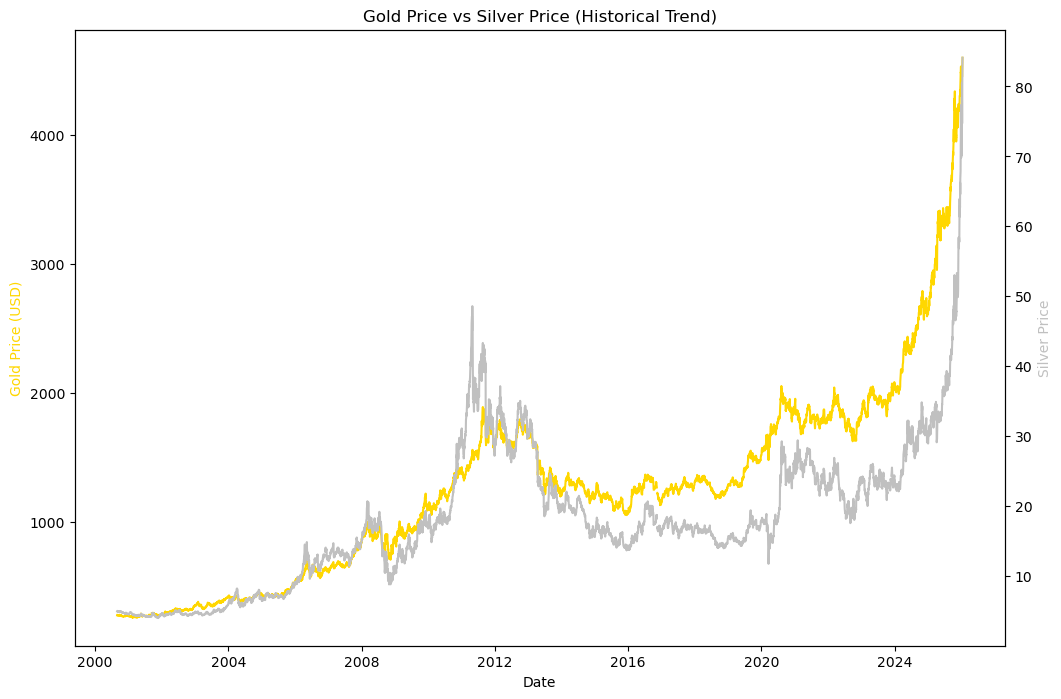

In [112]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,8))

ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price (USD)', color='gold')
ax1.plot(gold_silver_macro.index, gold_silver_macro['gold_price'], color='gold', label='Gold')

ax2 = ax1.twinx() 
ax2.set_ylabel('Silver Price', color='silver')
ax2.plot(gold_silver_macro.index, gold_silver_macro['silver_price'], color='silver', label='Silver')

plt.title('Gold Price vs Silver Price (Historical Trend)')
plt.show()

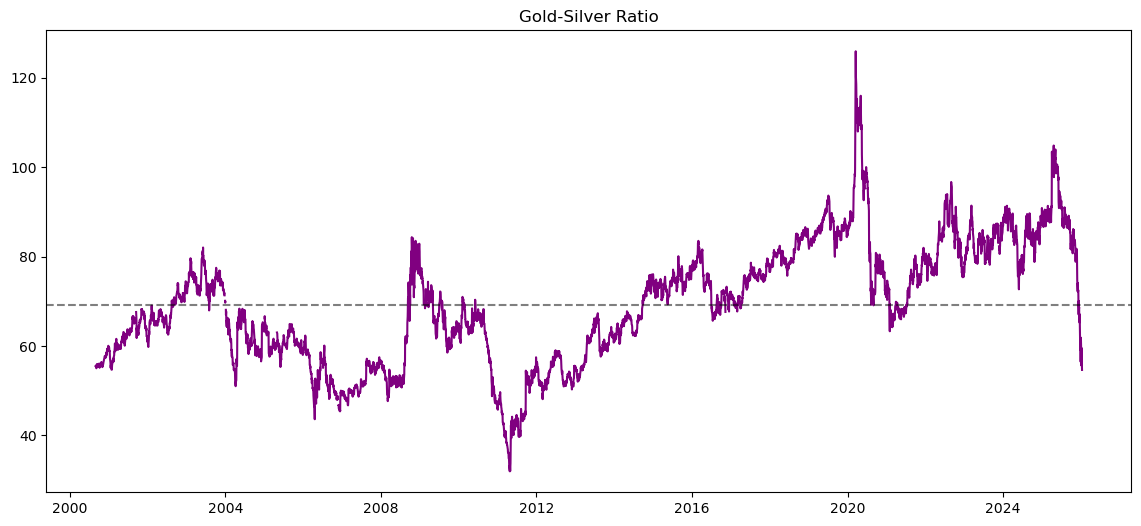

In [113]:
# Plot the time trend for Gold/Silver Ratio
import matplotlib.pyplot as plt

gold_silver_ratio = gold_silver_macro['gold_price'] / gold_silver_macro['silver_price']
plt.figure(figsize=(14, 6))
plt.plot(gold_silver_ratio.index, gold_silver_ratio, color='purple', linewidth=1.5, label='Gold-Silver Ratio')
plt.axhline(gold_silver_ratio.mean(), color='black', linestyle='--', alpha=0.5, label='Mean')
plt.title('Gold-Silver Ratio')
plt.show()

**Key Insights**

- Gold prices show a long-term upward trend with notable spikes during periods of economic uncertainty such as the 2008 financial crisis and the COVID-19 pandemic.
- Silver prices exhibit higher volatility compared to gold.
- Gold-Silver ratio tends to be within certain range indicating that ratio is mostly stationary and it also shows that Gold outperformed Silver during periods of economic uncertainity.
- Gold-Silver ratio can play an important role in the price prediction, it will be included as a feature in the dataset for model training.  

#### Distribution - Gold and Silver Price

This plot illustrates distribution of gold and silver price ranges

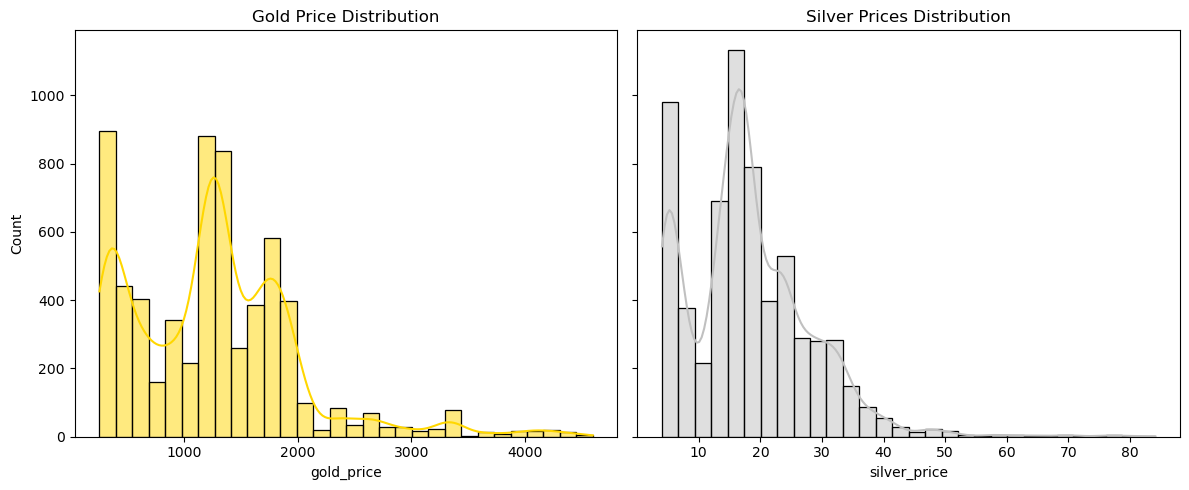

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(gold_silver_macro['gold_price'], bins=30, kde=True, ax=axes[0], color='gold')
axes[0].set_title("Gold Price Distribution")

sns.histplot(gold_silver_macro['silver_price'], bins=30, kde=True, ax=axes[1], color='silver')
axes[1].set_title("Silver Prices Distribution")

plt.tight_layout()
plt.show()

**Key Insights**

- As Gold and silver prices exhibit non-normal distributions, we will explore tree-based algorithms during modeling phase.
- Gold price distribution is much wider compared to that of silver, reflecting substantial long-term price appreciation and sensitivity to macroeconomic events such as financial crises, inflationary periods.
- Silver price distribution is more compact and seems more volatile in short-term compared to gold prices.

#### Trend Analysis - Macroeconomic Indicators

This plot illustrates the long term movement of macro-economic indicators over time


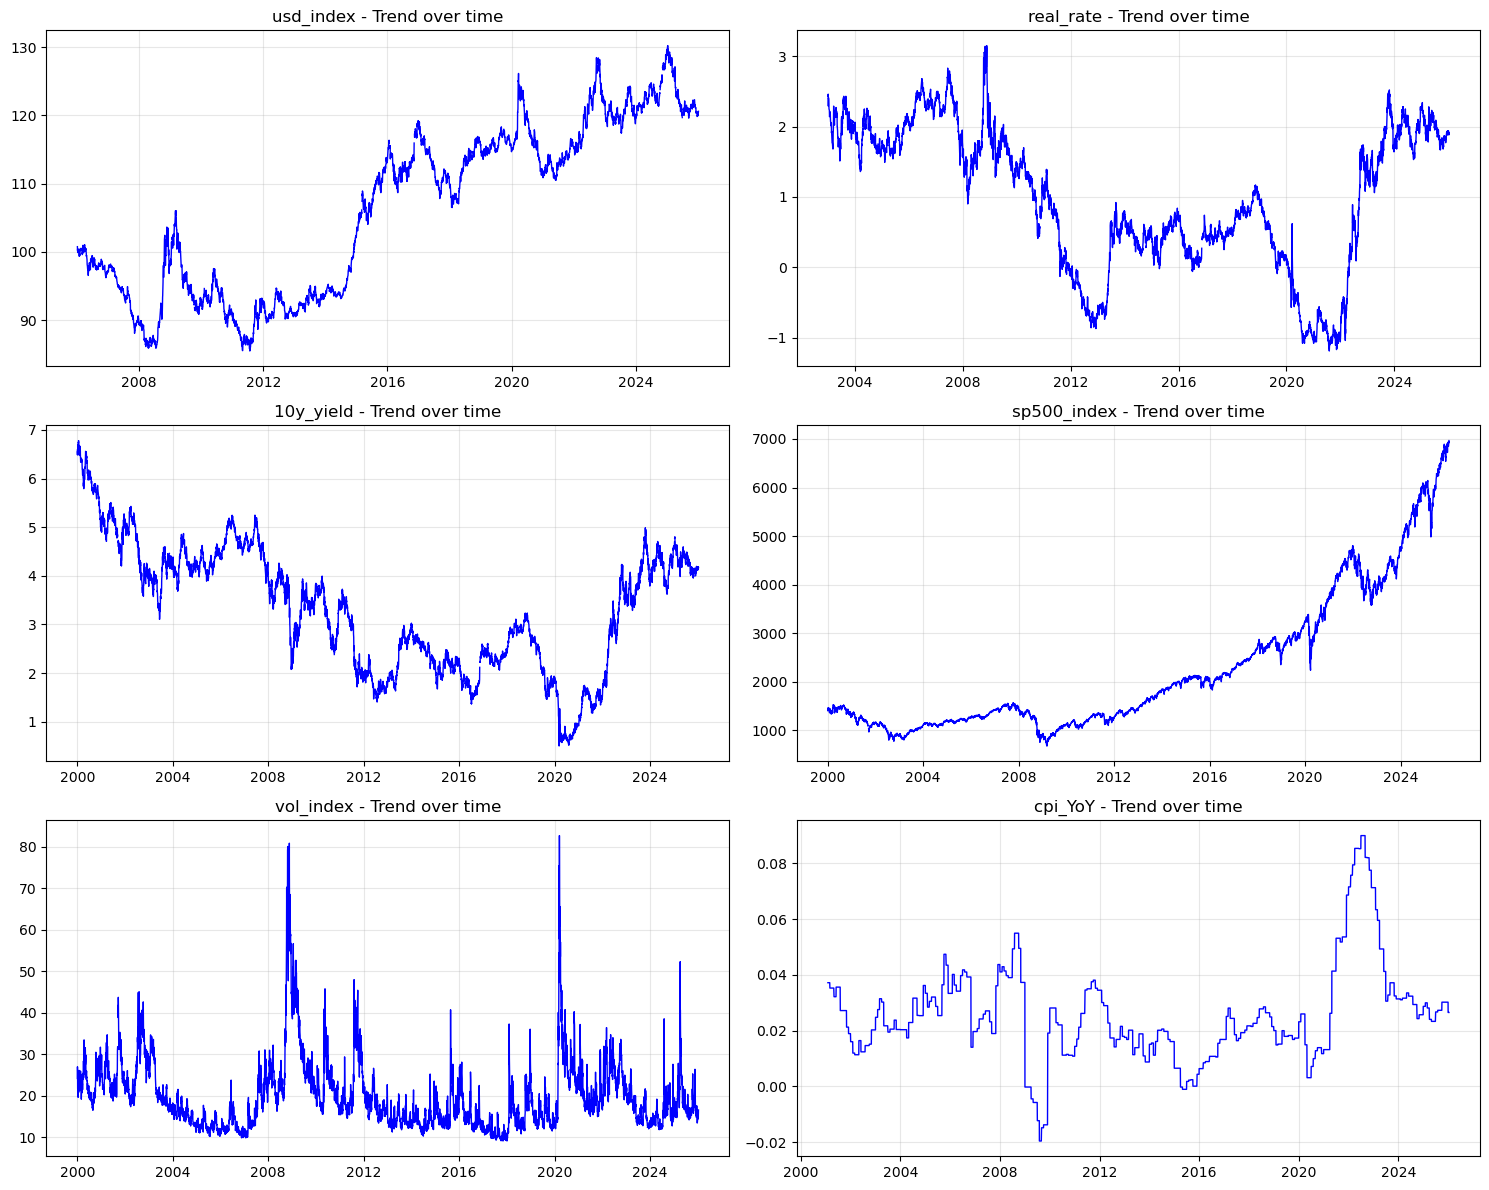

In [115]:
import matplotlib.pyplot as plt

# List of macro-economic features
macro_cols = ['usd_index', 'real_rate', '10y_yield', 'sp500_index', 'vol_index', 'cpi_YoY']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(macro_cols):
    axes[i].plot(gold_silver_macro.index, gold_silver_macro[col], color='blue', linewidth=1)
    axes[i].set_title(f'{col} - Trend over time', fontsize=12)
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Key Insights**

* Price and Index levels: Visual analysis of price and index levels (Gold, Silver, S&P 500, USD) showed significant long-term movements and non-stationarity. These must be converted to daily percentage returns to ensure the model learns from relative movement rather than absolute price levels.
* Volatility: Volatility indicators like the VIX were observed to be "mean-reverting" and range-bound. These features provide a constant measure of market fear and can be used as-is without any further derivations.
* Interest Rates: The 10-year yield and real interest rate moves in absolute basis points, so calculating the daily absolute change captures the velocity of interest rate changes.
* Inflation: To resolve the monthly-to-daily frequency mismatch, CPI YoY and MoM growth rates are used to provide a steady "inflationary regime" signal, as daily changes in monthly data would result in no signal for most of the days.


#### Correlation Analysis

Correlation analysis is done to understand the strength of relationship between the macro economic indicators and the gold/silver price, and to identify appropriate actions to be taken during feature engineering.

***Gold Price Vs USD Index Analysis***

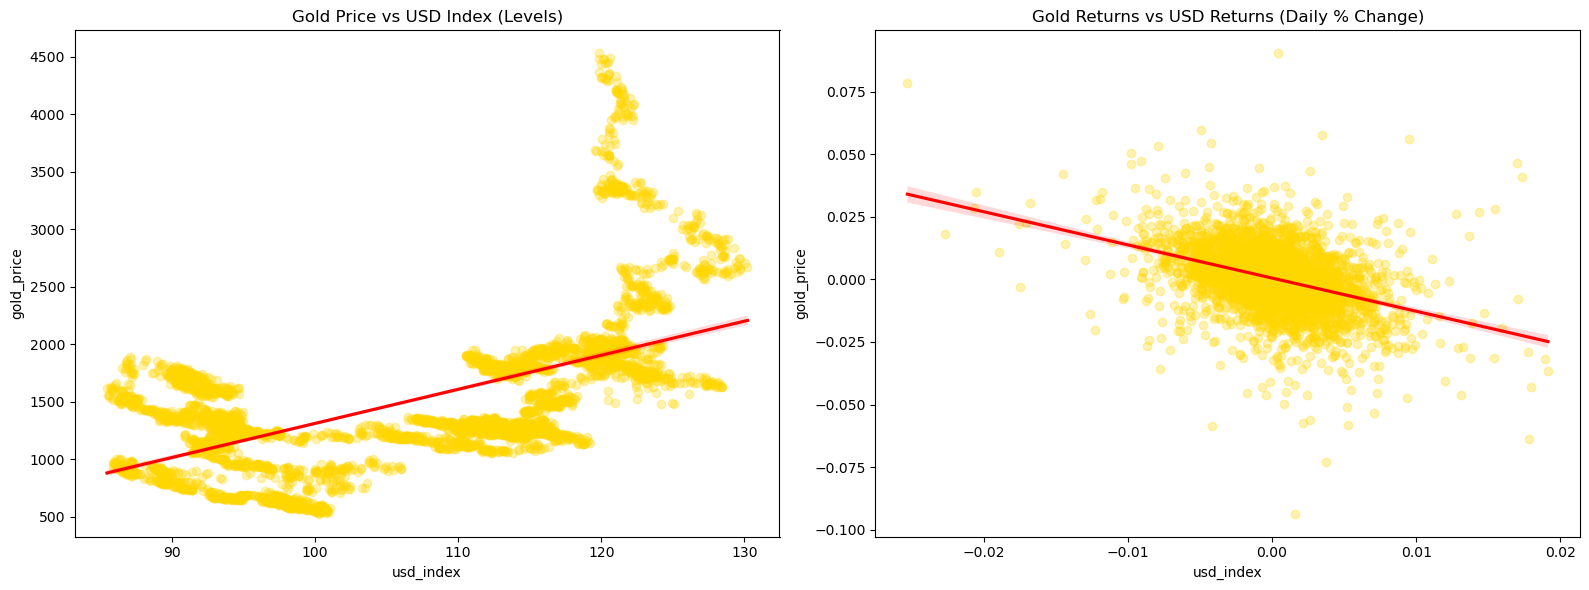

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot with actual levels of USD Index and Gold Price
sns.regplot(data=gold_silver_macro, x='usd_index', y='gold_price', color='gold',
            ax=ax1, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
ax1.set_title('Gold Price vs USD Index (Levels)')

# Plot with Percent Changes (Returns)
returns_df = gold_silver_macro[['gold_price', 'usd_index']].pct_change(fill_method=None).dropna()
sns.regplot(data=returns_df, x='usd_index', y='gold_price', color='gold',
            ax=ax2, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
ax2.set_title('Gold Returns vs USD Returns (Daily % Change)')

plt.tight_layout()
plt.show()

**Key Insights**

Correlation analysis of raw price levels of Gold and USD Index showed strong positive relationship between these two features which is not in accordance to the economic theory of inverse relationship, as both Gold and USD Index exhibits long-term drift causing spurious correlation. To resolves this, features were transformed into daily percent changes (returns) which correctly reflects the expected relationships. Same theory has been applied to other features wherever necessary.

***Gold/Silver vs Macroeconomic Indicators (Returns)***

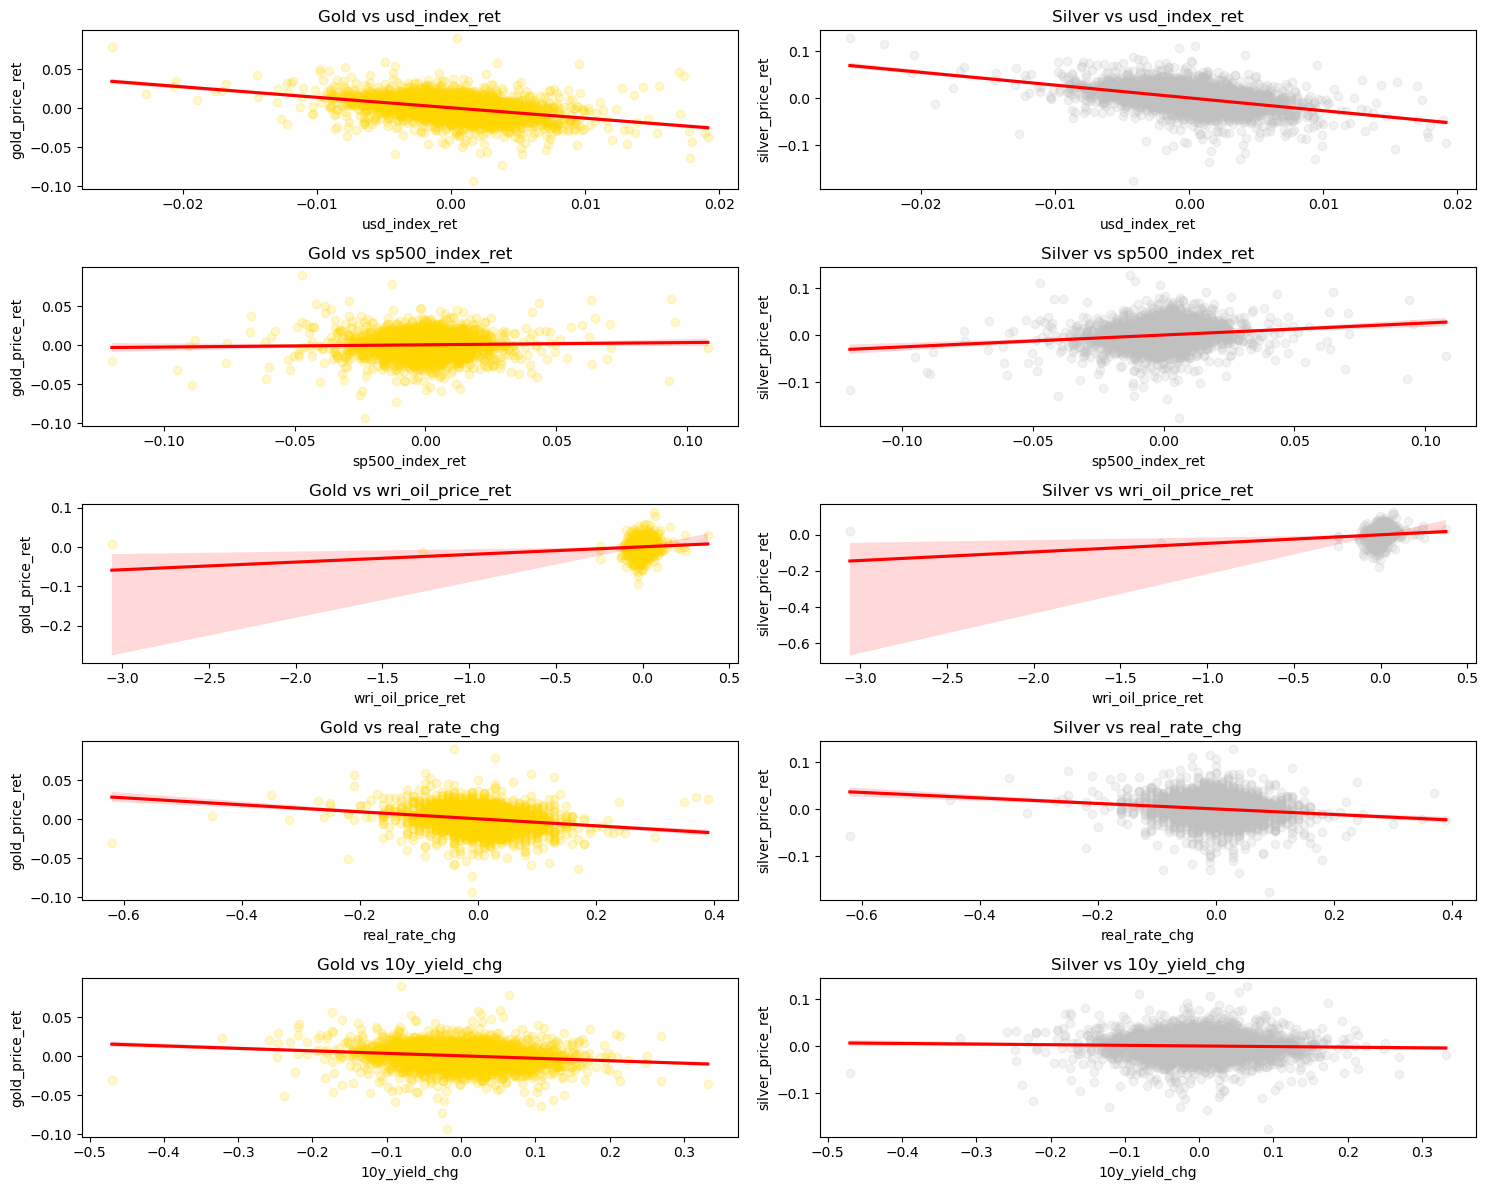

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a temporary dataframe to create additional features with returns (changes)
returns_df = pd.DataFrame(index=gold_silver_macro.index)
returns_df['gold_price_ret'] = gold_silver_macro['gold_price'].pct_change(fill_method=None)
returns_df['silver_price_ret'] = gold_silver_macro['silver_price'].pct_change(fill_method=None)
returns_df['usd_index_ret'] = gold_silver_macro['usd_index'].pct_change(fill_method=None)
returns_df['sp500_index_ret'] = gold_silver_macro['sp500_index'].pct_change(fill_method=None)
returns_df['wri_oil_price_ret'] = gold_silver_macro['wti_oil_price'].pct_change(fill_method=None)
returns_df['real_rate_chg'] = gold_silver_macro['real_rate'].diff()
returns_df['10y_yield_chg'] = gold_silver_macro['10y_yield'].diff()
returns_df = returns_df.dropna()

# 2. Define the macro drivers we want to test
cols = ['usd_index_ret', 'sp500_index_ret', 'wri_oil_price_ret', 'real_rate_chg', '10y_yield_chg']
fig, axes = plt.subplots(len(cols), 2, figsize=(15, 12))

for i, col in enumerate(cols):
    # Gold Column (Left)
    sns.regplot(data=returns_df, x=col, y='gold_price_ret', ax=axes[i, 0], 
                scatter_kws={'alpha':0.2, 'color':'gold'}, line_kws={'color':'red'})
    axes[i, 0].set_title(f'Gold vs {col}')
    
    # Silver Column (Right)
    sns.regplot(data=returns_df, x=col, y='silver_price_ret', ax=axes[i, 1], 
                scatter_kws={'alpha':0.2, 'color':'silver'}, line_kws={'color':'red'})
    axes[i, 1].set_title(f'Silver vs {col}')

plt.tight_layout()
plt.show()

#### Anomoly Detection

***WTI Oil Price Extreme Outliers***

Exploratory analysis of WTI Crude Oil revealed extreme outliers during the April 2020 oil crash where prices dropped to -$37.63 per barrel due to storage capacity exhaustion and contract expirations.This extreme outlier may influence prediction signals incorrectly, so to prevent these rare observations to skew the model's coefficients, the price was capped at 0.01 (instead of deleting to preserve the rest of the features for that day).

In [119]:
gold_silver_macro['wti_oil_price'].describe()

count    6374.000000
mean       64.656299
std        24.573726
min       -37.630001
25%        46.322500
50%        63.645000
75%        81.925001
max       145.289993
Name: wti_oil_price, dtype: float64

Below plot is created after capping the WTI Crude Oil price at 0.01

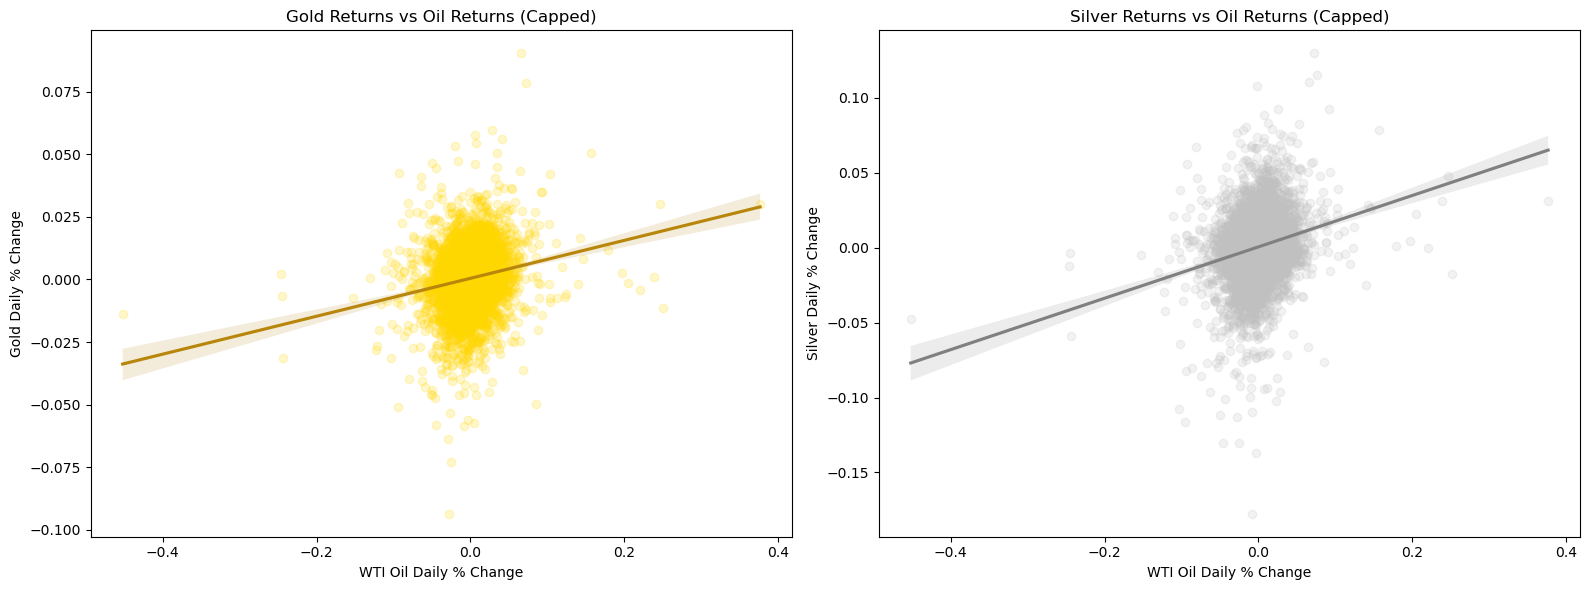

In [120]:
# Make a copy so that original dataset remains intact (which will be transformed during the data preparation)
df_temp = gold_silver_macro.copy()

# We replace values < 0.01 with NaN then forward fill to maintain time-series continuity
df_temp.loc[df_temp['wti_oil_price'] < 0.01, 'wti_oil_price'] = np.nan
df_temp['wti_oil_price'] = df_temp['wti_oil_price'].ffill()

# Calculate the returns
plot_df = pd.DataFrame(index=df_temp.index)
plot_df['oil_ret'] = df_temp['wti_oil_price'].pct_change(fill_method=None)
plot_df['gold_ret'] = df_temp['gold_price'].pct_change(fill_method=None)
plot_df['silver_ret'] = df_temp['silver_price'].pct_change(fill_method=None)
plot_df = plot_df.dropna()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gold vs Oil Plot
sns.regplot(data=plot_df, x='oil_ret', y='gold_ret', ax=axes[0],
            scatter_kws={'alpha':0.2, 'color':'gold'}, 
            line_kws={'color':'darkgoldenrod'})
axes[0].set_title('Gold Returns vs Oil Returns (Capped)')
axes[0].set_xlabel('WTI Oil Daily % Change')
axes[0].set_ylabel('Gold Daily % Change')

# Silver vs Oil Plot
sns.regplot(data=plot_df, x='oil_ret', y='silver_ret', ax=axes[1],
            scatter_kws={'alpha':0.2, 'color':'silver'}, 
            line_kws={'color':'gray'})
axes[1].set_title('Silver Returns vs Oil Returns (Capped)')
axes[1].set_xlabel('WTI Oil Daily % Change')
axes[1].set_ylabel('Silver Daily % Change')

plt.tight_layout()
plt.show()

**Key Insights**

Although gold and silver prices seems to be related, they exhibit different sensitivities to macroeconomic indicators. Therefore, separate predictive models will be developed for gold and silver to capture their distinct market dynamics and to provide clearer, metal-specific insights.

#### Correlation Matrix

This plot illustrates the strength of relationship between each pair of features. 

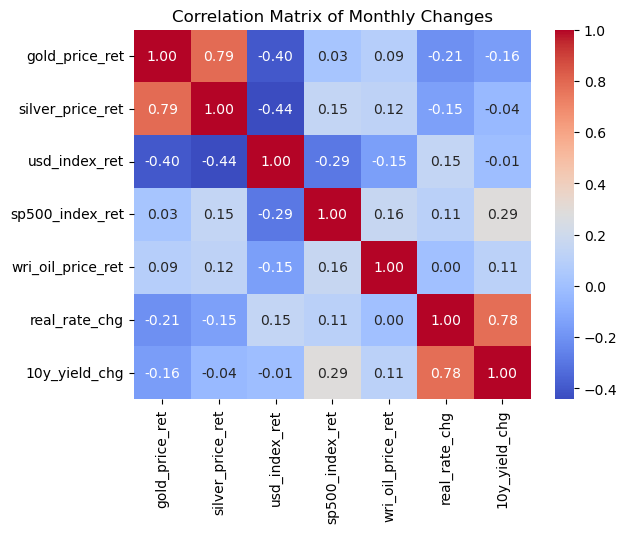

In [121]:
sns.heatmap(
    returns_df.corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Matrix of Monthly Changes")
plt.show()

**Key Insights**

Correlation between 10y_yield_chg and real_rate_chg (0.78) is high, but it is still less than the higher bound for statistical analysis which is 0.90. For now, we will keep both the features. During feature importance evaluation, we may exclude one of these features as needed. 

# Data Preparation

Based on the insights from data understanding phase, the final dataset will be prepared which will be used for modeling and evaluation.

## Display Data Information

In [122]:
# Prepare the temporary data set for the data transformations and feature 
gold_silver_prep = gold_silver_macro.copy().sort_index()

gold_silver_prep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6554 entries, 2000-01-03 to 2026-01-12
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gold_price     6365 non-null   float64
 1   silver_price   6367 non-null   float64
 2   wti_oil_price  6374 non-null   float64
 3   nat_gas_price  6371 non-null   float64
 4   sp500_index    6545 non-null   float64
 5   10y_yield      6539 non-null   float64
 6   vol_index      6546 non-null   float64
 7   cpi_level      6535 non-null   float64
 8   cpi_YoY        6282 non-null   float64
 9   cpi_MoM        6515 non-null   float64
 10  real_rate      5752 non-null   float64
 11  usd_index      4976 non-null   float64
dtypes: float64(12)
memory usage: 665.6 KB


### Replace extreme outliers - WTI Oil Price

Clip the extreme outlier (negative) price for WTI oil to \$0.01

In [123]:
gold_silver_prep['wti_oil_price'] = gold_silver_prep['wti_oil_price'].clip(lower=0.01)

## Feature Transormations

### Compute Returns

Add new features for keeping percent or absolute daily changes to prevent spurious correlation

In [124]:
# For price related - compute the percent daily change
price_cols = ['gold_price', 'silver_price', 'wti_oil_price', 'nat_gas_price', 'sp500_index', 'usd_index']
for col in price_cols:
    gold_silver_prep[f'{col}_ret'] = gold_silver_prep[col].pct_change(fill_method=None)

# For rate related - compute the absolute daily change
rate_cols = ['10y_yield', 'real_rate']
for col in rate_cols:
    gold_silver_prep[f'{col}_chg'] = gold_silver_prep[col].diff()

gold_silver_prep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6554 entries, 2000-01-03 to 2026-01-12
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gold_price         6365 non-null   float64
 1   silver_price       6367 non-null   float64
 2   wti_oil_price      6374 non-null   float64
 3   nat_gas_price      6371 non-null   float64
 4   sp500_index        6545 non-null   float64
 5   10y_yield          6539 non-null   float64
 6   vol_index          6546 non-null   float64
 7   cpi_level          6535 non-null   float64
 8   cpi_YoY            6282 non-null   float64
 9   cpi_MoM            6515 non-null   float64
 10  real_rate          5752 non-null   float64
 11  usd_index          4976 non-null   float64
 12  gold_price_ret     6343 non-null   float64
 13  silver_price_ret   6347 non-null   float64
 14  wti_oil_price_ret  6356 non-null   float64
 15  nat_gas_price_ret  6354 non-null   float64
 16  sp500_

## Feature Engineering

### Gold/Silver Ratio

Add gold/silver ratio

In [125]:
gold_silver_prep['gs_ratio'] = gold_silver_prep['gold_price'] / gold_silver_prep['silver_price']

### Lagged Features

1-day lag is applied to all independent variables to ensure the model uses only historically available information, thereby preventing data leakage.

In [126]:
# We lag these by 1 so the model uses 'Yesterday' to predict 'Tomorrow'
lag_targets = [
    'gold_price_ret', 'silver_price_ret', 'usd_index_ret', 
    'sp500_index_ret', 'wti_oil_price_ret', 'real_rate_chg', 
    '10y_yield_chg', 'vol_index', 'gs_ratio', 'cpi_YoY'
]
    
for col in lag_targets:
    gold_silver_prep[f'{col}_lag1'] = gold_silver_prep[col].shift(1)

gold_silver_prep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6554 entries, 2000-01-03 to 2026-01-12
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gold_price              6365 non-null   float64
 1   silver_price            6367 non-null   float64
 2   wti_oil_price           6374 non-null   float64
 3   nat_gas_price           6371 non-null   float64
 4   sp500_index             6545 non-null   float64
 5   10y_yield               6539 non-null   float64
 6   vol_index               6546 non-null   float64
 7   cpi_level               6535 non-null   float64
 8   cpi_YoY                 6282 non-null   float64
 9   cpi_MoM                 6515 non-null   float64
 10  real_rate               5752 non-null   float64
 11  usd_index               4976 non-null   float64
 12  gold_price_ret          6343 non-null   float64
 13  silver_price_ret        6347 non-null   float64
 14  wti_oil_price_ret     

### Rolling/Trend Features

In addition to the primary feature lags, a suite of technical features such as 5-day momentum, distance from the 20-day SMA, and 10-day rolling volatility were engineered. While the baseline model will be trained with lag features, these new features are prepared for the Modeling and Evaluation phase, where they will be used to test if capturing market trend and volatility improves predictive accuracy over the baseline.

In [127]:
# Rolling/Trend Features for GOLD
# 5-day cumulative return (Momentum)
gold_silver_prep['gold_mom_5'] = gold_silver_prep['gold_price_ret'].rolling(5).sum()
# Distance from 20-day Simple Moving Average (Mean Reversion/Trend)
gold_silver_prep['gold_sma_20'] = gold_silver_prep['gold_price'].rolling(20).mean()
gold_silver_prep['gold_dist_sma20'] = (gold_silver_prep['gold_price'] / gold_silver_prep['gold_sma_20']) - 1
# 10-day Rolling Volatility
gold_silver_prep['gold_vol_rolling'] = gold_silver_prep['gold_price_ret'].rolling(10).std()

# Shift by 1 to ensure we only use "Yesterday's" data
gold_silver_prep['gold_mom_5_lag1'] = gold_silver_prep['gold_mom_5'].shift(1)
gold_silver_prep['gold_dist_sma20_lag1'] = gold_silver_prep['gold_dist_sma20'].shift(1)
gold_silver_prep['gold_vol_rolling_lag1'] = gold_silver_prep['gold_vol_rolling'].shift(1)

In [128]:
# Rolling/Trend Features for SILVER
# 5-day cumulative return (Momentum)
gold_silver_prep['silver_mom_5'] = gold_silver_prep['silver_price_ret'].rolling(5).sum()
# Distance from 20-day Simple Moving Average (Mean Reversion/Trend)
gold_silver_prep['silver_sma_20'] = gold_silver_prep['silver_price'].rolling(20).mean()
gold_silver_prep['silver_dist_sma20'] = (gold_silver_prep['silver_price'] / gold_silver_prep['silver_sma_20']) - 1
# 10-day Rolling Volatility
gold_silver_prep['silver_vol_rolling'] = gold_silver_prep['silver_price_ret'].rolling(10).std()

# Shift by 1 to ensure we only use "Yesterday's" data
gold_silver_prep['silver_mom_5_lag1'] = gold_silver_prep['silver_mom_5'].shift(1)
gold_silver_prep['silver_dist_sma20_lag1'] = gold_silver_prep['silver_dist_sma20'].shift(1)
gold_silver_prep['silver_vol_rolling_lag1'] = gold_silver_prep['silver_vol_rolling'].shift(1)

gold_silver_prep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6554 entries, 2000-01-03 to 2026-01-12
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gold_price               6365 non-null   float64
 1   silver_price             6367 non-null   float64
 2   wti_oil_price            6374 non-null   float64
 3   nat_gas_price            6371 non-null   float64
 4   sp500_index              6545 non-null   float64
 5   10y_yield                6539 non-null   float64
 6   vol_index                6546 non-null   float64
 7   cpi_level                6535 non-null   float64
 8   cpi_YoY                  6282 non-null   float64
 9   cpi_MoM                  6515 non-null   float64
 10  real_rate                5752 non-null   float64
 11  usd_index                4976 non-null   float64
 12  gold_price_ret           6343 non-null   float64
 13  silver_price_ret         6347 non-null   float64
 14  wti_oi

### Prepare Target Variables

Add target variables for gold and silver which basically contains next day's price as the model need to predict next day's price based on the current day's values.

In [129]:
# Predict the Gold return for the NEXT trading day
gold_silver_prep['target_gold_next_day_ret'] = gold_silver_prep['gold_price_ret'].shift(-1)
gold_silver_prep['target_silver_next_day_ret'] = gold_silver_prep['silver_price_ret'].shift(-1)

## Data Cleanup

### Handle Missing Values

A limit of 5 days is applied to the forward-fill to bridge minor gaps caused by market holidays while preventing the propagation of stale data across extended periods of missing observations

In [130]:
# Forward fill missing values not spanned across multiple adjacent rows
gold_silver_prep = gold_silver_prep.ffill(limit=5)
gold_silver_ml = gold_silver_prep.dropna()

gold_silver_ml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4944 entries, 2006-01-05 to 2026-01-12
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gold_price                  4944 non-null   float64
 1   silver_price                4944 non-null   float64
 2   wti_oil_price               4944 non-null   float64
 3   nat_gas_price               4944 non-null   float64
 4   sp500_index                 4944 non-null   float64
 5   10y_yield                   4944 non-null   float64
 6   vol_index                   4944 non-null   float64
 7   cpi_level                   4944 non-null   float64
 8   cpi_YoY                     4944 non-null   float64
 9   cpi_MoM                     4944 non-null   float64
 10  real_rate                   4944 non-null   float64
 11  usd_index                   4944 non-null   float64
 12  gold_price_ret              4944 non-null   float64
 13  silver_price_re

## Features and targets for model training

The baseline model will be training using the lag features

In [131]:
# Feature list (X) - Only use the LAGGED features for BASELINE
features = [
    'gold_price_ret_lag1', 'silver_price_ret_lag1', 'wti_oil_price_ret_lag1', 
    'sp500_index_ret_lag1', 'usd_index_ret_lag1', '10y_yield_chg_lag1', 
    'real_rate_chg_lag1', 'vol_index_lag1', 'gs_ratio_lag1', 'cpi_YoY_lag1'
]

# Targets (y)
target_gold = 'target_gold_next_day_ret'
target_silver = 'target_silver_next_day_ret'

## Split Train/Test Data

In [132]:
# Chronological Split (80% Train, 20% Test)
split_idx = int(len(gold_silver_ml) * 0.8)

train_df = gold_silver_ml.iloc[:split_idx]
test_df = gold_silver_ml.iloc[split_idx:]

# Separate X and y
X_train = train_df[features]
X_test = test_df[features]

y_train_gold = train_df[target_gold]
y_test_gold = test_df[target_gold]

y_train_silver = train_df[target_silver]
y_test_silver = test_df[target_silver]


## Scale the data

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to dataFrame for easy viewing
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)

print(f"Training set size: {len(X_train_scaled)}")
print(f"Testing set size: {len(X_test_scaled)}")
print(f"Test data starts on: {X_test_scaled.index.min().date()}")

Training set size: 3955
Testing set size: 989
Test data starts on: 2022-01-13


# Modeling

Createing baseline models for both price prediction and price direction prediction. 
Linear regression will be used to create a baseline model using lag features for price prediction.
Logistic regression will be used to create a baseline model using lag features for price direction prediction.

## Price Prediction Models

A baseline model is developed to predict the gold and silver prices using Linear Regression with lag features

### Linear Regression - GOLD (Baseline)

Establishing a baseline for Gold price prediction using a Linear Regression model to identify the predictive strength of primary macro-economic lag features.

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and Train the Model
model_gold = LinearRegression()
model_gold.fit(X_train_scaled, y_train_gold)

# Make Predictions
y_pred_gold = model_gold.predict(X_test_scaled)

# Calculate Key Evaluation Metrics
mae = mean_absolute_error(y_test_gold, y_pred_gold)
rmse = np.sqrt(mean_squared_error(y_test_gold, y_pred_gold))
r2 = r2_score(y_test_gold, y_pred_gold)

print(f"--- Gold Price Prediction Baseline (Linear Regression) Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R-squared Score: {r2:.6f}")

--- Gold Price Prediction Baseline (Linear Regression) Metrics ---
Mean Absolute Error (MAE): 0.007652
Root Mean Squared Error (RMSE): 0.010343
R-squared Score: -0.007067


#### Feature Importance

10y_yield_chg_lag1       -0.000849
silver_price_ret_lag1    -0.000360
usd_index_ret_lag1       -0.000337
cpi_YoY_lag1             -0.000115
wti_oil_price_ret_lag1    0.000026
gold_price_ret_lag1       0.000037
gs_ratio_lag1             0.000101
sp500_index_ret_lag1      0.000269
vol_index_lag1            0.000272
real_rate_chg_lag1        0.000612
dtype: float64


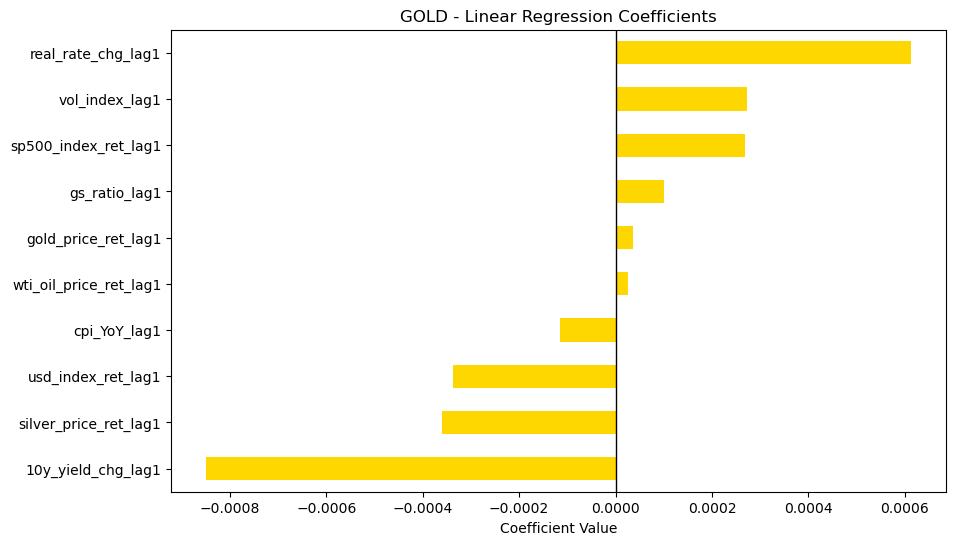

In [135]:
import matplotlib.pyplot as plt

# Create a Series for easy plotting
coef_series = pd.Series(model_gold.coef_, index=features).sort_values()
print(coef_series)

plt.figure(figsize=(10, 6))
coef_series.plot(kind='barh', color='gold')
plt.title("GOLD - Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.axvline(0, color='black', lw=1)
plt.show()

**Findings**

- The baseline Linear Regression model returned an R^2 score of -0.0065, indicating that the model failed to explain any of the variance in Gold returns using simple linear lags. This result confirms that macro-economic drivers do not impact Gold prices in a strictly linear fashion. While this confirms the difficulty of price-point forecasting, it serves as a critical justification for the next phase of the project: transitioning to Logistic Regression for directional classification and exploring Non-linear Ensemble methods to extract price direction signals from the data.
- Due to presence of strong correlation between real rates and 10-year yield, real rate feature will be removed thereby mitigating multi-collinearity.

### Linear Regression - SILVER (Baseline)

Establishing a baseline for Silver price prediction using a Linear Regression model to identify the predictive strength of primary macro-economic lag features.

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Initialize and Train the Model for Silver
# Note: We use the same X_train_scaled but change the target to y_train_silver
model_silver = LinearRegression()
model_silver.fit(X_train_scaled, y_train_silver)

# 2. Make Predictions
y_pred_silver = model_silver.predict(X_test_scaled)

# 3. Calculate Key Metrics
mae_s = mean_absolute_error(y_test_silver, y_pred_silver)
rmse_s = np.sqrt(mean_squared_error(y_test_silver, y_pred_silver))
r2_s = r2_score(y_test_silver, y_pred_silver)

print(f"--- Silver Baseline Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_s:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_s:.6f}")
print(f"R-squared Score: {r2_s:.6f}")

--- Silver Baseline Metrics ---
Mean Absolute Error (MAE): 0.014869
Root Mean Squared Error (RMSE): 0.020673
R-squared Score: -0.008600


#### Feature Importance

cpi_YoY_lag1             -0.000644
sp500_index_ret_lag1     -0.000495
usd_index_ret_lag1       -0.000430
10y_yield_chg_lag1       -0.000188
real_rate_chg_lag1       -0.000184
wti_oil_price_ret_lag1    0.000017
silver_price_ret_lag1     0.000057
gs_ratio_lag1             0.000362
gold_price_ret_lag1       0.000385
vol_index_lag1            0.000467
dtype: float64


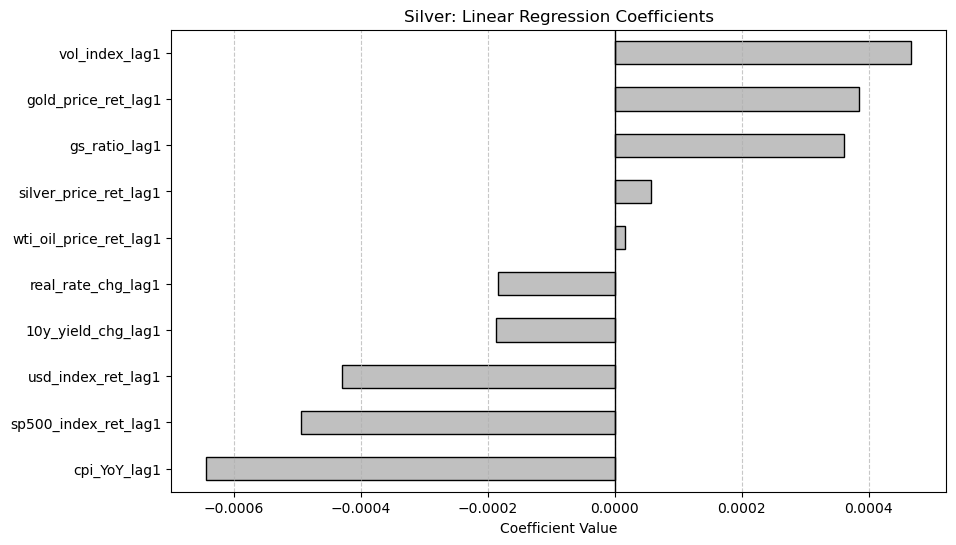

In [137]:
# Coefficients
coef_silver = pd.Series(model_silver.coef_, index=features).sort_values()
print(coef_silver)

plt.figure(figsize=(10, 6))
coef_silver.plot(kind='barh', color='silver', edgecolor='black')
plt.title("Silver: Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.axvline(0, color='black', lw=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Findings**

Similar findings as that of Gold.

## Price Direction Models (Classification)

A baseline model is developed to predict the gold and silver price movements using Logistic Regression with lag features

### Logistic Regression - GOLD (Baseline)

Establishing a baseline for Gold price direction using a Logistic Regression model to identify the predictive strength of primary macro-economic lag features in determining the price directions.

--- Gold Price Direction Baseline ---
Accuracy Score: 46.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.77      0.56       443
           1       0.54      0.23      0.32       546

    accuracy                           0.47       989
   macro avg       0.49      0.50      0.44       989
weighted avg       0.50      0.47      0.43       989



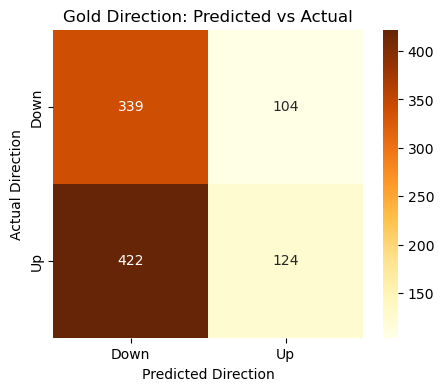

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# If daily return was positive, classify it as 1 (UP), else 0 (DOWN)
y_train_gold_bin = (y_train_gold > 0).astype(int)
y_test_gold_bin = (y_test_gold > 0).astype(int)

# Train the model with the scaled test data and classified targets

logreg_gold = LogisticRegression(class_weight='balanced')
logreg_gold.fit(X_train_scaled, y_train_gold_bin)

# Predict and Check for accuracy score
y_pred_bin = logreg_gold.predict(X_test_scaled)
acc = accuracy_score(y_test_gold_bin, y_pred_bin)

print(f"--- Gold Price Direction Baseline ---")
print(f"Accuracy Score: {acc:.2%}")
print("\nClassification Report:")
print(classification_report(y_test_gold_bin, y_pred_bin))

# Create confusion matrix
matrix = confusion_matrix(y_test_gold_bin, y_pred_bin)
plt.figure(figsize=(5, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Gold Direction: Predicted vs Actual')
plt.ylabel('Actual Direction')
plt.xlabel('Predicted Direction')
plt.show()

**Findings**

- The baseline directional model achieved an accuracy of 47.82%, slightly below the random-chance threshold. Detailed analysis of the classification report reveals a strong bias toward predicting downward movement (80% recall for Class 0) while failing to capture the upward movements.
- These results reinforce the conclusion that simple linear classification is insufficient for this dataset, justifying the move to Rolling/Trend features and Non-linear ensemble models in the next phase to improve the balance between precision and recall.

### Logistic Regression - SILVER (Baseline)

Establishing a baseline for Silver price direction using a Logistic Regression model to identify the predictive strength of primary macro-economic lag features in determining the price directions.

--- Silver Price Direction Baseline ---
Accuracy Score: 46.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.89      0.61       461
           1       0.50      0.09      0.16       528

    accuracy                           0.47       989
   macro avg       0.48      0.49      0.38       989
weighted avg       0.48      0.47      0.37       989



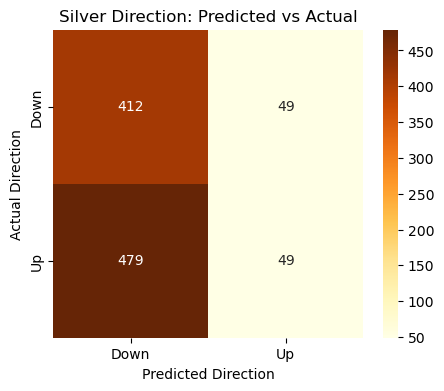

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# If daily return was positive, classify it as 1 (UP), else 0 (DOWN)
y_train_silver_bin = (y_train_silver > 0).astype(int)
y_test_silver_bin = (y_test_silver > 0).astype(int)

# Train the model with the scaled test data and classified targets

logreg_silver = LogisticRegression(class_weight='balanced')
logreg_silver.fit(X_train_scaled, y_train_silver_bin)

# Predict and Check for accuracy score
y_pred_bin = logreg_silver.predict(X_test_scaled)
acc = accuracy_score(y_test_silver_bin, y_pred_bin)

print(f"--- Silver Price Direction Baseline ---")
print(f"Accuracy Score: {acc:.2%}")
print("\nClassification Report:")
print(classification_report(y_test_silver_bin, y_pred_bin))

# Create confusion matrix
matrix = confusion_matrix(y_test_silver_bin, y_pred_bin)
plt.figure(figsize=(5, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Silver Direction: Predicted vs Actual')
plt.ylabel('Actual Direction')
plt.xlabel('Predicted Direction')
plt.show()

**Findings**

Similar findings as that of Gold

## Baseline Findings

- Both the price prediction and price direction baseline models using linear and logistic regression models respectively with the lag features achieved sub-optimal scores for both gold and silver. The baseline results confirm that predicting Gold/Silver prices/movements using simple lag features is highly ineffective.
- Following improvements will be considered in the next phase.
  - Incorporate trend/rolling (momentum, volatility, moving averages) features to train the models with more context.
  - Transition from linear models to ensemble methods to capture non-linear relationships.

# Modeling (Contd)

Continuing from the baseline models for price prediction and price movement prediction, more models will be explored. 

## Price Prediction

We apply **Ridge** and **Lasso** Regression to refine our price predictions, utilizing automated hyperparameter tuning to identify and prioritize the most impactful macro-economic drivers. We will then move onto tree-based algorithms - **Radom Forest Regressor** to compare the evaluation metrics.

### Ridge Regression - GOLD

In [140]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ridge = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_gold)

best_ridge = grid_search.best_estimator_
y_pred_gold = best_ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test_gold, y_pred_gold)
rmse = np.sqrt(mean_squared_error(y_test_gold, y_pred_gold))
r2 = r2_score(y_test_gold, y_pred_gold)

# Display Results
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R-squared Score: {r2:.6f}")

Best Alpha: 1000
Mean Absolute Error (MAE): 0.007641
Root Mean Squared Error (RMSE): 0.010329
R-squared Score: -0.004339


## Lasso Regression - GOLD 

In [141]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create Lasso
lasso = Lasso(max_iter=10000)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train_gold)

# Get the best estimator from GridSearchCV
best_lasso = grid_search_lasso.best_estimator_
y_pred_gold_lasso = best_lasso.predict(X_test_scaled)

# Get the evaluation metrics
mae_lasso = mean_absolute_error(y_test_gold, y_pred_gold_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test_gold, y_pred_gold_lasso))
r2_lasso = r2_score(y_test_gold, y_pred_gold_lasso)

# Check how many features Lasso retained
coefficients = best_lasso.coef_
kept_features = np.sum(coefficients != 0)

# Display Results
print(f"Best Alpha: {grid_search_lasso.best_params_['alpha']}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.6f}")
print(f"R-squared Score: {r2_lasso:.6f}")
print(f"Features Retained: {kept_features} out of {X_train_scaled.shape[1]}")

Best Alpha: 0.01
Mean Absolute Error (MAE): 0.007639
Root Mean Squared Error (RMSE): 0.010322
R-squared Score: -0.003141
Features Retained: 0 out of 10


## Random Forest Regressor - GOLD

In [143]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define Model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV and Fit the model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, 
                              scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_rf.fit(X_train_scaled, y_train_gold)

# Extract the best model and make predictions
best_rf = grid_search_rf.best_estimator_
y_pred_gold_rf = best_rf.predict(X_test_scaled)

# Calculate Evaluation Metrics
mae_rf = mean_absolute_error(y_test_gold, y_pred_gold_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_gold, y_pred_gold_rf))
r2_rf = r2_score(y_test_gold, y_pred_gold_rf)

# Display Results
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Mean Absolute Error (MAE): {mae_rf:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.6f}")
print(f"R-squared Score: {r2_rf:.6f}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Mean Absolute Error (MAE): 0.007678
Root Mean Squared Error (RMSE): 0.010367
R-squared Score: -0.011814


**Findings**

Despite applying Regularization (Ridge/Lasso) and Ensemble methods (Random Forest), the $R^2$ scores remained consistently negative, and the Lasso model reduced all feature coefficients to zero. This indicates that daily macro-economic lags do not have a direct linear or non-linear predictive relationship with exact price returns. Consequently, we will move our focus onto Price Direction Classification, focusing on predicting market movement (Up/Down).

## Price Direction Prediction

To improve upon the linear baseline using Logistic Regression, we will implement **Random Forest Classifier** to capture non-linear relationships, comparing a model using only historical lags against an enhanced version with trend and rolling features.

### Random Forest Classifier - GOLD

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 500}

--- Random Forest Classifier - Gold Accuracy: 54.50% ---

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.02      0.05       443
           1       0.55      0.97      0.70       546

    accuracy                           0.54       989
   macro avg       0.46      0.50      0.37       989
weighted avg       0.47      0.54      0.41       989



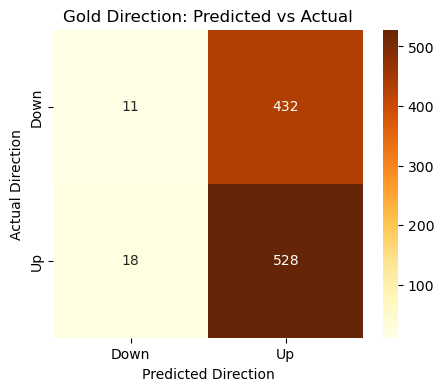

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# If daily return was positive, classify it as 1 (UP), else 0 (DOWN)
y_train_gold_bin = (y_train_gold > 0).astype(int)
y_test_gold_bin = (y_test_gold > 0).astype(int)

# Define the Parameter Grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Grid Search and fit the model
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train_gold_bin)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

y_pred_final = best_model.predict(X_test_scaled)
final_acc = accuracy_score(y_test_gold_bin, y_pred_final)

print(f"\n--- Random Forest Classifier - Gold Accuracy: {final_acc:.2%} ---")
print("\nClassification Report:")
print(classification_report(y_test_gold_bin, y_pred_final))

# Create confusion matrix
matrix = confusion_matrix(y_test_gold_bin, y_pred_final)
plt.figure(figsize=(5, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Gold Direction: Predicted vs Actual')
plt.ylabel('Actual Direction')
plt.xlabel('Predicted Direction')
plt.show()

### Random Forest Classifier - SILVER

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}

--- Random Forest Classifier - Silver Accuracy: 52.88% ---

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       461
           1       0.53      0.98      0.69       528

    accuracy                           0.53       989
   macro avg       0.43      0.50      0.36       989
weighted avg       0.44      0.53      0.38       989



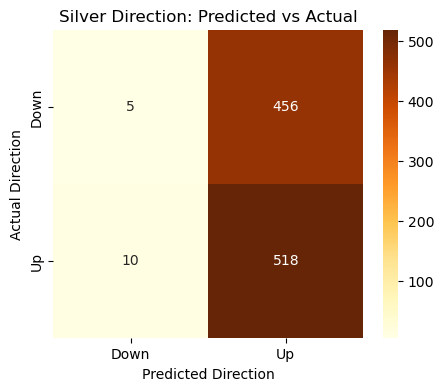

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# If daily return was positive, classify it as 1 (UP), else 0 (DOWN)
y_train_silver_bin = (y_train_silver > 0).astype(int)
y_test_silver_bin = (y_test_silver > 0).astype(int)

# Define the Parameter Grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Grid Search and fit the model
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train_silver_bin)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

y_pred_final = best_model.predict(X_test_scaled)
final_acc = accuracy_score(y_test_silver_bin, y_pred_final)

print(f"\n--- Random Forest Classifier - Silver Accuracy: {final_acc:.2%} ---")
print("\nClassification Report:")
print(classification_report(y_test_silver_bin, y_pred_final))

# Create confusion matrix
matrix = confusion_matrix(y_test_silver_bin, y_pred_final)
plt.figure(figsize=(5, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Silver Direction: Predicted vs Actual')
plt.ylabel('Actual Direction')
plt.xlabel('Predicted Direction')
plt.show()

**Findings**

* The Random Forest Classification models for both Gold (54.50%) and Silver (52.88%) outperformed the Logistic Regression. This confirms that the relationships between macro indicators and gold/silver prices are non-linear.

### Enhanced Modeling: The Impact of Trend Features

We transitioned from a purely macro-economic feature set to a hybrid model including technical indicators (trend and rolling), aiming to capture the non-linear relationship between market momentum and subsequent price direction.

In [146]:
# Add trend/rolling features to the lag features
gold_lag_trend_features = [
    'gold_price_ret_lag1', 'silver_price_ret_lag1', 'usd_index_ret_lag1', 
    'sp500_index_ret_lag1', 'wti_oil_price_ret_lag1', 'real_rate_chg_lag1', 
    '10y_yield_chg_lag1', 'vol_index_lag1', 'gs_ratio_lag1', 'cpi_YoY_lag1',
    'gold_mom_5_lag1', 'gold_dist_sma20_lag1', 'gold_vol_rolling_lag1'
]

silver_lag_trend_features = [
    'gold_price_ret_lag1', 'silver_price_ret_lag1', 'usd_index_ret_lag1', 
    'sp500_index_ret_lag1', 'wti_oil_price_ret_lag1', 'real_rate_chg_lag1', 
    '10y_yield_chg_lag1', 'vol_index_lag1', 'gs_ratio_lag1', 'cpi_YoY_lag1',
    'silver_mom_5_lag1', 'silver_dist_sma20_lag1', 'silver_vol_rolling_lag1'
]

# Create a new dataframe with binary classification targets for Gold and Silver
gold_silver_trend_ml = gold_silver_ml.copy()
gold_silver_trend_ml['target_gold_bin'] = (gold_silver_trend_ml['target_gold_next_day_ret'] > 0).astype(int)
gold_silver_trend_ml['target_silver_bin'] = (gold_silver_trend_ml['target_silver_next_day_ret'] > 0).astype(int)

### Enhanced Modeling: Split Test/Train Data

In [147]:
split_idx = int(len(gold_silver_trend_ml) * 0.8)
train_df = gold_silver_trend_ml.iloc[:split_idx].copy()
test_df = gold_silver_trend_ml.iloc[split_idx:].copy()

# Train and test data for Gold
X_trend_train_gold = train_df[gold_lag_trend_features]
y_trend_train_gold = train_df['target_gold_bin']
X_trend_test_gold = test_df[gold_lag_trend_features]
y_trend_test_gold = test_df['target_gold_bin']

# Train and test data for Silver
X_trend_train_silver = train_df[silver_lag_trend_features]
y_trend_train_silver = train_df['target_silver_bin']
X_trend_test_silver = test_df[silver_lag_trend_features]
y_trend_test_silver = test_df['target_silver_bin']

### Enhanced Modeling: Scale the data

In [148]:
from sklearn.preprocessing import StandardScaler

scaler_gold = StandardScaler()
X_trend_train_gold_scaled = scaler_gold.fit_transform(X_trend_train_gold)
X_trend_test_gold_scaled = scaler_gold.transform(X_trend_test_gold)

scaler_silver = StandardScaler()
X_trend_train_silver_scaled = scaler_silver.fit_transform(X_trend_train_silver)
X_trend_test_silver_scaled = scaler_silver.transform(X_trend_test_silver)

### Enhanced Modeling: Random Forest Classifier - GOLD

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Final Optimized Accuracy: 53.29%

Final Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.12      0.19       443
           1       0.55      0.87      0.67       546

    accuracy                           0.53       989
   macro avg       0.49      0.49      0.43       989
weighted avg       0.49      0.53      0.45       989



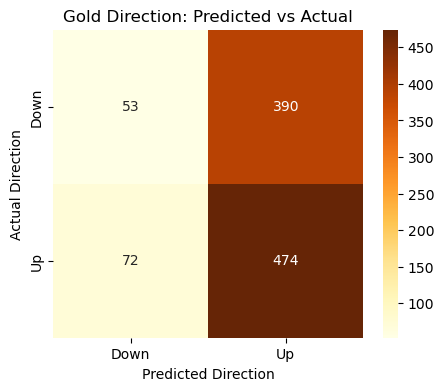

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

grid_search_rf.fit(X_trend_train_gold_scaled, y_trend_train_gold)

best_rf_gold = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_gold.predict(X_trend_test_gold_scaled)

print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Final Optimized Accuracy: {accuracy_score(y_trend_test_gold, y_pred_best_rf):.2%}")
print("\nFinal Classification Report:")
print(classification_report(y_trend_test_gold, y_pred_best_rf))

# Create confusion matrix
matrix = confusion_matrix(y_trend_test_gold, y_pred_best_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Gold Direction: Predicted vs Actual')
plt.ylabel('Actual Direction')
plt.xlabel('Predicted Direction')
plt.show()

### Enhanced Modeling: Random Forest Classifier - SILVER

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Final Optimized Accuracy: 53.08%

Final Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.23      0.31       461
           1       0.54      0.80      0.64       528

    accuracy                           0.53       989
   macro avg       0.52      0.51      0.48       989
weighted avg       0.52      0.53      0.49       989



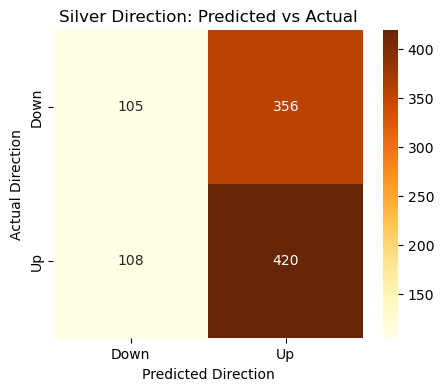

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

grid_search_rf.fit(X_trend_train_silver_scaled, y_trend_train_silver)

best_rf_silver = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_silver.predict(X_trend_test_silver_scaled)

print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Final Optimized Accuracy: {accuracy_score(y_trend_test_silver, y_pred_best_rf):.2%}")
print("\nFinal Classification Report:")
print(classification_report(y_trend_test_silver, y_pred_best_rf))

# Create confusion matrix
matrix = confusion_matrix(y_trend_test_silver, y_pred_best_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Silver Direction: Predicted vs Actual')
plt.ylabel('Actual Direction')
plt.xlabel('Predicted Direction')
plt.show()

**Findings**

The transition from a lag-only model to a hybrid Lag + Trend approach resulted in a slight reduction in raw accuracy (53.29% for gold and 53.08% for silver) but achieved a significantly more balanced predictive profile. By incorporating trend/momentum features, the model’s ability to identify downward reversals (Class 0 Recall - ability to catch days when market turns and goes down) improved significantly. This suggests that while macro-economic lags drive the primary gold trend, technical indicators are essential for capturing the non-linear reversals that traditional lag features often miss.

### Enhanced Modeling: XGBoost Classifier - GOLD

Now, we will apply Gradient Boosting (XGBoost) to see if its sequential learning can better minimize the errors in these 'down' day predictions.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
XGB Optimized Accuracy: 52.88%

Final Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.18      0.26       443
           1       0.55      0.81      0.66       546

    accuracy                           0.53       989
   macro avg       0.49      0.50      0.46       989
weighted avg       0.50      0.53      0.48       989



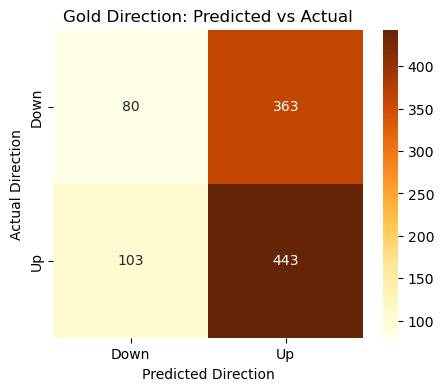

In [151]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV and fit the model
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search_xgb.fit(X_trend_train_gold_scaled, y_trend_train_gold)

# Extract best estimator and predict data based on that
best_xgb_gold = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_gold.predict(X_trend_test_gold_scaled)

print(f"Best XGB Params: {grid_search_xgb.best_params_}")
print(f"XGB Optimized Accuracy: {accuracy_score(y_trend_test_gold, y_pred_xgb):.2%}")

print("\nFinal Classification Report:")
print(classification_report(y_trend_test_gold, y_pred_xgb))

# Create confusion matrix
matrix = confusion_matrix(y_trend_test_gold, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Gold Direction: Predicted vs Actual')
plt.ylabel('Actual Direction')
plt.xlabel('Predicted Direction')
plt.show()

### Enhanced Modeling: XGBoost Classifier - SILVER

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
XGB Optimized Accuracy: 52.58%

Final Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.13      0.21       461
           1       0.53      0.87      0.66       528

    accuracy                           0.53       989
   macro avg       0.50      0.50      0.43       989
weighted avg       0.50      0.53      0.45       989



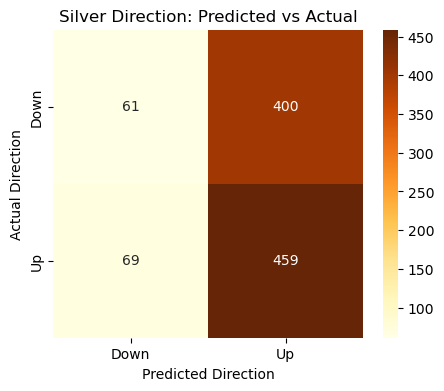

In [152]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV and fit the model
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search_xgb.fit(X_trend_train_silver_scaled, y_trend_train_silver)

# Extract best estimator and predict data based on that
best_xgb_silver = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_silver.predict(X_trend_test_silver_scaled)

print(f"Best XGB Params: {grid_search_xgb.best_params_}")
print(f"XGB Optimized Accuracy: {accuracy_score(y_trend_test_silver, y_pred_xgb):.2%}")

print("\nFinal Classification Report:")
print(classification_report(y_trend_test_silver, y_pred_xgb))

# Create confusion matrix
matrix = confusion_matrix(y_trend_test_silver, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Silver Direction: Predicted vs Actual')
plt.ylabel('Actual Direction')
plt.xlabel('Predicted Direction')
plt.show()

**Gold Price Direction Prediction:** 

The XGBoost model emerged as the most robust predictor for gold, achieving a more sophisticated balance between catching 'up' days and identifying 'turning down' days. By utilizing sequential boosting, it reached a Class 0 Recall of 18%, proving it is not just following the trend but actively looking for market reversals. While its raw accuracy (52.88%) was slightly lower than the Random Forest, its superior ability to navigate market reversals makes it the most reliable choice for a real-world trading environment.

**Silver Price Direction Prediction:**

The XGBoost model achieved a Macro F1-Score of 0.43 and a Class 1 (Up) Recall of 87%, ensuring that the model remains highly sensitive to upward momentum while maintaining a disciplined approach to reversals. While its raw accuracy (52.58%) was slightly less than the Random Forest, its superior precision for "Down" days (47%) indicates it is less prone to "false alarms" in declining markets.

## Evaluation

### Verdict

We evaluated three model architectures - Random Forest (Lag features), Random Forest (Lag + Trend features) and XGBoost (Lag + Trend features) - across two distinct assets gold and silver.

**Gold Price Direction: XGBoost** was selected because it offered the highest "Predictive Intelligence" (Macro F1: 0.46), successfully shifting away from a biased strategy to one that identifies market downward reversals.

**Silver Price Direction: Random Forest (Lag + Trend)** was selected. Unlike Gold, Silver's volatility was better captured by Random Forest, which achieved a superior Class 0 Recall of 23%.

### Feature Importance - GOLD

gold_vol_rolling_lag1     0.089596
gold_mom_5_lag1           0.081434
vol_index_lag1            0.080569
cpi_YoY_lag1              0.080195
silver_price_ret_lag1     0.077247
gold_dist_sma20_lag1      0.077116
10y_yield_chg_lag1        0.076844
usd_index_ret_lag1        0.076475
real_rate_chg_lag1        0.075922
gs_ratio_lag1             0.074234
wti_oil_price_ret_lag1    0.072864
gold_price_ret_lag1       0.071318
sp500_index_ret_lag1      0.066185
dtype: float32


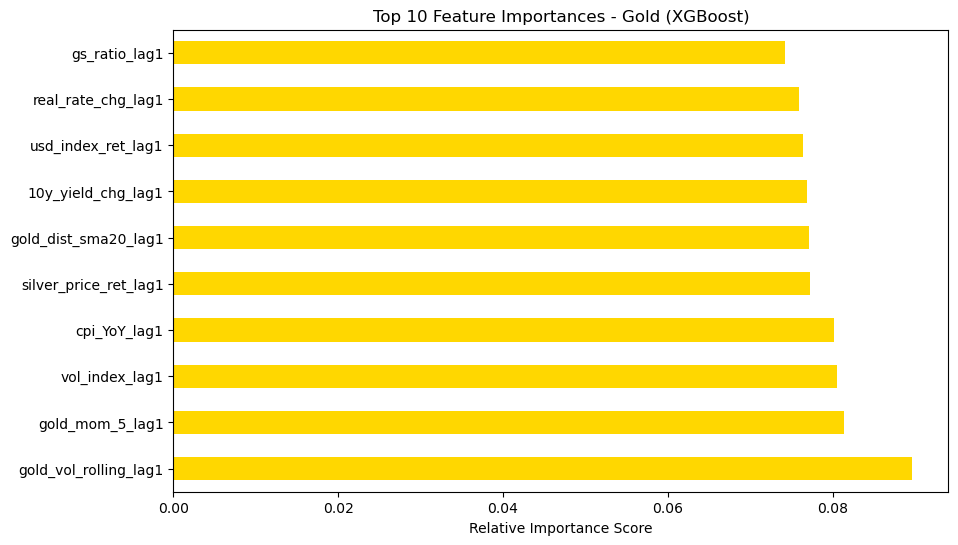

In [162]:
# --- For Gold (XGBoost) ---
feat_importances_gold = pd.Series(best_xgb_gold.feature_importances_, index=X_trend_train_gold.columns)
print(feat_importances_gold.sort_values(ascending=False))
plt.figure(figsize=(10,6))
feat_importances_gold.nlargest(10).plot(kind='barh', color='gold')
plt.title('Top 10 Feature Importances - Gold (XGBoost)')
plt.xlabel('Relative Importance Score')
plt.show()

**Key Insights**

* XGBoost model assigned nearly equal weight (ranging from 0.07 to 0.08) to a broad set of indicators.
* Market sentiment and volatility are the primary drivers of gold price as high volatility often precedes a change in trend.
* By looking at the 5-day momentum and the distance from the 20-day SMA, the model can identify when gold is "overextended".
* The traditional macro indicators Year-on-Year CPI and 10-year treasury yield have significant influence on gold price movements.

### Feature Importance - SILVER

silver_mom_5_lag1          0.089167
usd_index_ret_lag1         0.086608
sp500_index_ret_lag1       0.085581
vol_index_lag1             0.085420
gs_ratio_lag1              0.084816
silver_price_ret_lag1      0.081472
silver_vol_rolling_lag1    0.077879
10y_yield_chg_lag1         0.077096
wti_oil_price_ret_lag1     0.076180
silver_dist_sma20_lag1     0.075359
gold_price_ret_lag1        0.072533
cpi_YoY_lag1               0.057271
real_rate_chg_lag1         0.050619
dtype: float64


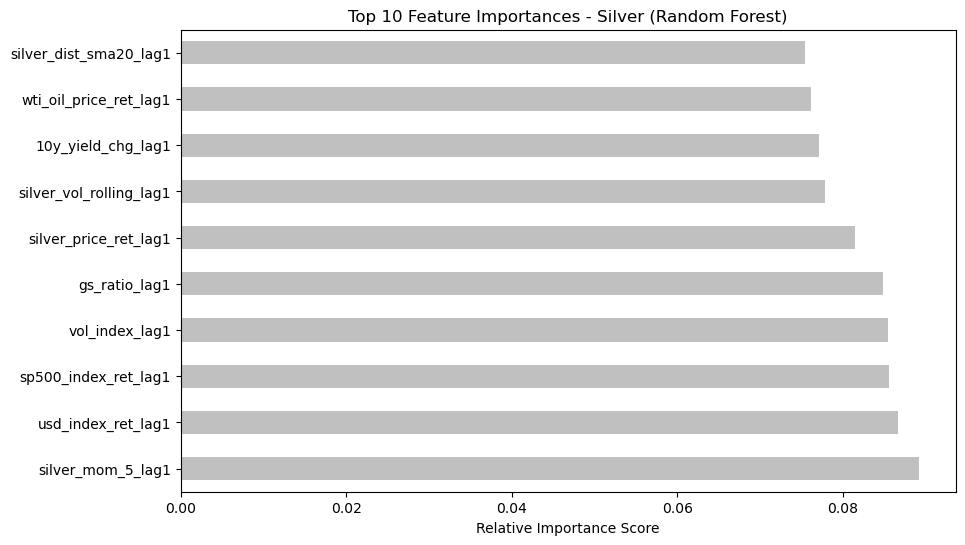

In [163]:
# --- For Silver (Random Forest) ---
feat_importances_silver = pd.Series(best_rf_silver.feature_importances_, index=X_trend_train_silver.columns)
print(feat_importances_silver.sort_values(ascending=False))
plt.figure(figsize=(10,6))
feat_importances_silver.nlargest(10).plot(kind='barh', color='silver')
plt.title('Top 10 Feature Importances - Silver (Random Forest)')
plt.xlabel('Relative Importance Score')
plt.show()

**Key Insights**

* Similar to gold, the Random Forest model distributed weight across a broad set of features (0.07 to 0.08), ensuring the model is not over-reliant on a single "magic" indicator.
* Unlike gold, silver is heavily influenced by the S&P 500 and Energy prices (WTI Oil), reflecting its role as an industrial commodity tied to economic growth.
* The top feature, 5-day momentum, confirms that Silver is a momentum-driven market.
* The Gold/Silver ratio is a top-5 feature for Silver, whereas it was less critical for Gold. A high Gold-Silver ratio often signals that Silver is overextended to the downside and is due for a massive catch-up rally.

## Deployment

* The models (XGBoost for Gold and Random Forest for Silver) will be deployed as a Decision Support System (DSS) rather than a fully automated execution bot. This allows a human trader to use the model's "Directional Bias" to take informed decisions.
* The models will not remain static; they will be constantly evaluated against real-world market data at regular intervals (e.g., weekly or monthly). This allows us to monitor for "Model Drift," ensuring that the logic the model learned in training still applies to current market conditions. If performance metrics like the F1-Score drop below a pre-defined threshold, a full retraining and hyperparameter optimization cycle will be triggered.
* While the current models rely on technical and macro-economic data, future iterations will explore unstructured data sources to account for major events. This includes:
  * **Geopolitical Sentiment**: Integrating news-based sentiment analysis to gauge the impact of conflicts or trade wars.
  * **Event-Driven Indicators**: Factoring in natural calamities or sudden supply-chain disruptions that historical price lags might not immediately capture.

## Project Author & Certification

**Author**: Satish Kumar Pothuri

**Project**: Final Capstone

**Program**: Professional Certificate in Machine Learning & Artificial Intelligence | **Institution**: [*UC Berkeley Executive Education* / Emeritus]

**Contact**: [LinkedIn](https://www.linkedin.com/in/satishpothuri/)